## Data Visualization and Machine Learning Model on Titanic Dataset.

## Importing Required Libraries.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Reading CSV File

## This dataset contains the Titanic survival information about various passengers who onboarded the voyage.

### SUMMARY

- This is a classic dataset used in many data mining tutorials and demos
- Perfect for exploratory analysis and building binary classification models to predict survival.
- Data covers passengers only, not crew.

### Features

1. survival - Survival (0 = No; 1= Yes)
2. class - Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)
3. name - Name
4. sex - Sex
5. age - Age
6. sibsp - Number of Siblings/Spouses Aboard
7. parch - Number of Parents/Children Aboard
8. ticket - Ticket Number
9. fare - Passenger Fare
10. cabin - Cabin
11. embarked - Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)
12. boat - Lifeboat (if survived)
13. body - Body number (if did not survive and body was recovered)

## Data Preprocessing

## Seeing the Columns of Dataset.

In [ ]:
print("Columns of Dataset are:\n", df.columns)

print("\nShape of Dataset is:", df.shape)

Columns of Dataset are:
 Index(['pclass', 'survived', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket',
       'fare', 'cabin', 'embarked', 'boat', 'body', 'home.dest'],
      dtype='object')

Shape of Dataset is: (1309, 14)


## Checking the Data types of Columns.

In [ ]:
# Total Count of Datatypes
print("Datatype of Dataset is:")
df.info()

# According to Columns
data_types = df.dtypes

print("\nDatatypes of Columns is:\n")
print(data_types)

Datatype of Dataset is:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB

Datatypes of Columns is:

pclass         int64
survived       int64
name          object
sex           object
age          float64
sibsp          int64
parch       

## Seeing Descriptive Statics of Dataset.

In [ ]:
print("Descriptive Statics of Dataset are:\n")
df.describe(include = 'all')

Descriptive Statics of Dataset are:



pclass     survived                  name   sex          age  \
count   1309.000000  1309.000000                  1309  1309  1046.000000   
unique          NaN          NaN                  1307     2          NaN   
top             NaN          NaN  Connolly, Miss. Kate  male          NaN   
freq            NaN          NaN                     2   843          NaN   
mean       2.294882     0.381971                   NaN   NaN    29.881135   
std        0.837836     0.486055                   NaN   NaN    14.413500   
min        1.000000     0.000000                   NaN   NaN     0.166700   
25%        2.000000     0.000000                   NaN   NaN    21.000000   
50%        3.000000     0.000000                   NaN   NaN    28.000000   
75%        3.000000     1.000000                   NaN   NaN    39.000000   
max        3.000000     1.000000                   NaN   NaN    80.000000   

              sibsp        parch    ticket         fare        cabin embarked  \
count   1309.000000  1309.000000      1309  1308.000000          295     1307   
unique          NaN          NaN       939          NaN          186        3   
top             NaN          NaN  CA. 2343          NaN  C23 C25 C27        S   
freq            NaN          NaN        11          NaN            6      914   
mean       0.498854     0.385027       NaN    33.295479          NaN      NaN   
std        1.041658     0.865560       NaN    51.758668          NaN      NaN   
min        0.000000     0.000000       NaN     0.000000          NaN      NaN   
25%        0.000000     0.000000       NaN     7.895800          NaN      NaN   
50%        0.000000     0.000000       NaN    14.454200          NaN      NaN   
75%        1.000000     0.000000       NaN    31.275000          NaN      NaN   
max        8.000000     9.000000       NaN   512.329200          NaN      NaN   

       boat        body     home.dest  
count   486  121.000000           745  
unique   28         NaN           369  
top      13         NaN  New York, NY  
freq     39         NaN            64  
mean    NaN  160.809917           NaN  
std     NaN   97.696922           NaN  
min     NaN    1.000000           NaN  
25%     NaN   72.000000           NaN  
50%     NaN  155.000000           NaN  
75%     NaN  256.000000           NaN  
max     NaN  328.000000           NaN

## Checking for Null Values in Dataset.

In [ ]:
print("Count of Null Values in Dataset is:\n")
df.isnull().sum()

Count of Null Values in Dataset is:



pclass          0
survived        0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
dtype: int64

## Since the number of Missing Values is Large we cannot directly drop them instead we will focus on each column and impute based on requirements.
## We first need to convert the columns to numeric and only after that we can do any further method.
## First we will do conversion for columns which do not have missing values then we will focus on columns with missing values.

### Converting Column Sex to Numeric.

In [ ]:
# Converting Sex column to Numeric
# Seeing the count of unique values
print("Unique Category with count in Column Sex is:\n")
print(df['sex'].value_counts())

# Now we will map values according to category 0 for male and 1 for female
df['sex'] = df['sex'].map({'male' : 0, 'female' : 1})

print("\nAfter Converting to Numeric Column Sex is:\n")
print(df['sex'].value_counts())

Unique Category with count in Column Sex is:

male      843
female    466
Name: sex, dtype: int64

After Converting to Numeric Column Sex is:

0    843
1    466
Name: sex, dtype: int64


### Converting Column Ticket to Numeric.

In [ ]:
print("Column Ticket is:\n")
print(df['ticket'])

# Seeing if any category is present
print("\nUnique Category with count in Column Ticket is:\n")
print(df['ticket'].value_counts())

# This Column also contains extra characters and symbols and we need to remove that
# This keeps all the digits and remove all other symbols and characters
df['ticket'] = df['ticket'].replace('[^0-9]', '', regex=True)

# Since this column now contains numeric values in the form of strings we can directly convert to numeric
df['ticket'] = df['ticket'].apply(pd.to_numeric)

# If some values will not be converted to Numeric we will replace them with mean
df['ticket'].fillna(df['ticket'].mean(), inplace = True)

print("\nColumn Ticket after converting to Numeric is:\n")
print(df['ticket'])

Column Ticket is:

0        24160
1       113781
2       113781
3       113781
4       113781
         ...  
1304      2665
1305      2665
1306      2656
1307      2670
1308    315082
Name: ticket, Length: 1309, dtype: object

Unique Category with count in Column Ticket is:

CA. 2343        11
CA 2144          8
1601             8
S.O.C. 14879     7
3101295          7
                ..
C 7076           1
341826           1
7546             1
3474             1
315082           1
Name: ticket, Length: 939, dtype: int64

Column Ticket after converting to Numeric is:

0        24160.0
1       113781.0
2       113781.0
3       113781.0
4       113781.0
          ...   
1304      2665.0
1305      2665.0
1306      2656.0
1307      2670.0
1308    315082.0
Name: ticket, Length: 1309, dtype: float64


### For Numeric Columns we can directly replace missing values with Mean.
### Handling Missing Values in Column Age and Body by imputing with Mean.

In [ ]:
df[['age', 'body', 'fare']] = df[['age', 'body', 'fare']].fillna(df[['age', 'body', 'fare']].mean())

### Handling Missing Values and Converting Column Cabin to Numeric.

In [ ]:
print("Column Cabin is:\n")
print(df['cabin'])

# Seeing if any category is present
print("\nUnique Category with count in Column Cabin is:\n")
print(df['cabin'].value_counts())

# Here we can see that the most occuring category is C23 C25 C27 so we will replace missing values with this category
df['cabin'] = df['cabin'].fillna('C23 C25 C27')

# Since Categories are present
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the column to obtain encoded values
df['cabin'] = label_encoder.fit_transform(df['cabin'])

# Display the DataFrame after encoding
print("\nColumn Cabin after converting to Numeric is:\n")
print(df['cabin'])

# Seeing if any category is present
print("\nUnique Category with count in Column Cabin after encoding is:\n")
print(df['cabin'].value_counts())

Column Cabin is:

0            B5
1       C22 C26
2       C22 C26
3       C22 C26
4       C22 C26
         ...   
1304        NaN
1305        NaN
1306        NaN
1307        NaN
1308        NaN
Name: cabin, Length: 1309, dtype: object

Unique Category with count in Column Cabin is:

C23 C25 C27        6
G6                 5
B57 B59 B63 B66    5
F4                 4
F33                4
                  ..
C132               1
E60                1
B52 B54 B56        1
C49                1
F38                1
Name: cabin, Length: 186, dtype: int64

Column Cabin after converting to Numeric is:

0       43
1       79
2       79
3       79
4       79
        ..
1304    80
1305    80
1306    80
1307    80
1308    80
Name: cabin, Length: 1309, dtype: int64

Unique Category with count in Column Cabin after encoding is:

80     1020
47        5
184       5
181       4
60        4
       ... 
76        1
168       1
46        1
89        1
182       1
Name: cabin, Length: 186, dtype: int64


### Handling Missing Values and Converting Column Embarked to Numeric.

In [ ]:
print("Column Embarked is:\n")
print(df['embarked'])

# Seeing if any category is present
print("\nUnique Category with count in Column Embarked is:\n")
print(df['embarked'].value_counts())

# Here we can see that the most occuring category is S so we will replace missing values with this category
df['embarked'].fillna('S', inplace = True)

# Now Mapping the Values of Columns as Numeric values
# Now we will map values according to category 0 for S and 1 for C and 2 for Q
df['embarked'] = df['embarked'].map({'S' : 0, 'C' : 1, 'Q' : 2})

print("\nAfter Converting to Numeric Column Embarked is:\n")
print(df['embarked'].value_counts())

Column Embarked is:

0       S
1       S
2       S
3       S
4       S
       ..
1304    C
1305    C
1306    C
1307    C
1308    S
Name: embarked, Length: 1309, dtype: object

Unique Category with count in Column Embarked is:

S    914
C    270
Q    123
Name: embarked, dtype: int64

After Converting to Numeric Column Embarked is:

0    916
1    270
2    123
Name: embarked, dtype: int64


### Handling Missing Values and Converting Column Boat to Numeric.

In [ ]:
print("Column Boat is:\n")
print(df['boat'])

# Seeing if any category is present
print("\nUnique Category with count in Column Boat is:\n")
print(df['boat'].value_counts())

# Here we can see that the most occuring category is 13 so we will replace missing values with this category
df['boat'].fillna('13', inplace = True)

# This Column also contains extra characters and symbols and we need to remove that
# This keeps all the digits and remove all other symbols and characters
df['boat'] = df['boat'].replace('[^0-9]', '', regex=True)

# Since this column now contains numeric values in the form of strings we can directly convert to numeric
df['boat'] = df['boat'].apply(pd.to_numeric)

print("\nColumn Boat after converting to Numeric is:\n")
print(df['boat'])

Column Boat is:

0        2.0
1       11.0
2       13.0
3       13.0
4       13.0
        ... 
1304    13.0
1305    13.0
1306    13.0
1307    13.0
1308    13.0
Name: boat, Length: 1309, dtype: float64

Unique Category with count in Column Boat is:

13.0      862
15.0       37
14.0       33
4.0        31
10.0       29
5.0        27
3.0        26
9.0        25
11.0       25
7.0        23
8.0        23
16.0       23
6.0        20
12.0       19
2.0        13
1.0         5
1315.0      3
57.0        2
810.0       1
59.0        1
1516.0      1
Name: boat, dtype: int64

Column Boat after converting to Numeric is:

0        2.0
1       11.0
2       13.0
3       13.0
4       13.0
        ... 
1304    13.0
1305    13.0
1306    13.0
1307    13.0
1308    13.0
Name: boat, Length: 1309, dtype: float64


### Handling Missing Values in Column Home Dest

In [ ]:
print("Column Home Dest is:\n")
print(df['home.dest'])

# Seeing if any category is present
print("\nUnique Category with count in Column Boat is:\n")
print(df['home.dest'].value_counts())

# Here we can see that the most occuring category is  so we will replace missing values with this category
df['home.dest'].fillna('New York, NY', inplace = True)

print("\nAfter Imputing Missing Values Column Home Dest is:\n")
print(df['home.dest'].value_counts())

Column Home Dest is:

0                          St Louis, MO
1       Montreal, PQ / Chesterville, ON
2       Montreal, PQ / Chesterville, ON
3       Montreal, PQ / Chesterville, ON
4       Montreal, PQ / Chesterville, ON
                     ...               
1304                                NaN
1305                                NaN
1306                                NaN
1307                                NaN
1308                                NaN
Name: home.dest, Length: 1309, dtype: object

Unique Category with count in Column Boat is:

New York, NY                                    64
London                                          14
Montreal, PQ                                    10
Paris, France                                    9
Cornwall / Akron, OH                             9
                                                ..
Chelsea, London                                  1
Harrow-on-the-Hill, Middlesex                    1
Copenhagen, Denmark                  

### Extracting First, Last name and Titles as different columns for Name Column.

In [ ]:
# For Column Name
print("Column Name is:\n")
print(df['name'])

# For ignoring warnings
import warnings
warnings.filterwarnings("ignore")

# Splitting first and last names
df[['last_name', 'first_name']] = df['name'].str.split(', ', 1, expand=True)

# Extracting titles
df['title'] = df['first_name'].str.extract('([A-Za-z]+)\.')

# Removing titles from first names
df['first_name'] = df['first_name'].str.replace('[A-Za-z]+\.', '')

# Dropping the Name column
df.drop('name', axis = 1, inplace = True)

# Displaying the updated DataFrame
print("Updated Dataframe is:\n")
print(df)

Column Name is:

0                         Allen, Miss. Elisabeth Walton
1                        Allison, Master. Hudson Trevor
2                          Allison, Miss. Helen Loraine
3                  Allison, Mr. Hudson Joshua Creighton
4       Allison, Mrs. Hudson J C (Bessie Waldo Daniels)
                             ...                       
1304                               Zabour, Miss. Hileni
1305                              Zabour, Miss. Thamine
1306                          Zakarian, Mr. Mapriededer
1307                                Zakarian, Mr. Ortin
1308                                 Zimmerman, Mr. Leo
Name: name, Length: 1309, dtype: object
Updated Dataframe is:

      pclass  survived  sex        age  sibsp  parch    ticket      fare  \
0          1         1    1  29.000000      0      0   24160.0  211.3375   
1          1         1    0   0.916700      1      2  113781.0  151.5500   
2          1         0    1   2.000000      1      2  113781.0  151.5500   


## After Handling Missing Columns and conversion to numeric Values, seeing Descriptive Statistics of Dataset.

In [ ]:
print("Descriptive Statics of Dataset after Preprocessing are:\n")
df.describe(include = 'all')

Descriptive Statics of Dataset after Preprocessing are:



pclass     survived          sex          age        sibsp  \
count   1309.000000  1309.000000  1309.000000  1309.000000  1309.000000   
unique          NaN          NaN          NaN          NaN          NaN   
top             NaN          NaN          NaN          NaN          NaN   
freq            NaN          NaN          NaN          NaN          NaN   
mean       2.294882     0.381971     0.355997    29.881135     0.498854   
std        0.837836     0.486055     0.478997    12.883199     1.041658   
min        1.000000     0.000000     0.000000     0.166700     0.000000   
25%        2.000000     0.000000     0.000000    22.000000     0.000000   
50%        3.000000     0.000000     0.000000    29.881135     0.000000   
75%        3.000000     1.000000     1.000000    35.000000     1.000000   
max        3.000000     1.000000     1.000000    80.000000     8.000000   

              parch        ticket         fare        cabin     embarked  \
count   1309.000000  1.309000e+03  1309.000000  1309.000000  1309.000000   
unique          NaN           NaN          NaN          NaN          NaN   
top             NaN           NaN          NaN          NaN          NaN   
freq            NaN           NaN          NaN          NaN          NaN   
mean       0.385027  6.599428e+05    33.295479    83.786096     0.394194   
std        0.865560  3.109464e+06    51.738879    25.790353     0.653499   
min        0.000000  2.000000e+00     0.000000     0.000000     0.000000   
25%        0.000000  1.696600e+04     7.895800    80.000000     0.000000   
50%        0.000000  1.130440e+05    14.454200    80.000000     0.000000   
75%        0.000000  3.470870e+05    31.275000    80.000000     1.000000   
max        9.000000  2.310129e+07   512.329200   185.000000     2.000000   

               boat         body     home.dest  last_name first_name title  
count   1229.000000  1309.000000          1309       1309       1309  1309  
unique          NaN          NaN           369        875       1125    18  
top             NaN          NaN  New York, NY  Andersson       John    Mr  
freq            NaN          NaN           628         11         15   757  
mean      16.994304   160.809917           NaN        NaN        NaN   NaN  
std       80.606885    29.591544           NaN        NaN        NaN   NaN  
min        1.000000     1.000000           NaN        NaN        NaN   NaN  
25%       13.000000   160.809917           NaN        NaN        NaN   NaN  
50%       13.000000   160.809917           NaN        NaN        NaN   NaN  
75%       13.000000   160.809917           NaN        NaN        NaN   NaN  
max     1516.000000   328.000000           NaN        NaN        NaN   NaN

## Checking for Null Values in Dataset after Preprocessing.

In [ ]:
print("Count of Null Values in Dataset after Preprocessing is:\n")
df.isnull().sum()

Count of Null Values in Dataset after Preprocessing is:



pclass        0
survived      0
sex           0
age           0
sibsp         0
parch         0
ticket        0
fare          0
cabin         0
embarked      0
boat          0
body          0
home.dest     0
last_name     0
first_name    0
title         0
dtype: int64

## Checking the Data types of Columns after Preprocessing.

In [ ]:
# Total Count of Datatypes
print("Datatype of Dataset is:")
df.info()

# According to Columns
data_types = df.dtypes

print("\nDatatypes of Columns is:\n")
print(data_types)

Datatype of Dataset is:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   pclass      1309 non-null   int64  
 1   survived    1309 non-null   int64  
 2   sex         1309 non-null   int64  
 3   age         1309 non-null   float64
 4   sibsp       1309 non-null   int64  
 5   parch       1309 non-null   int64  
 6   ticket      1309 non-null   float64
 7   fare        1309 non-null   float64
 8   cabin       1309 non-null   int64  
 9   embarked    1309 non-null   int64  
 10  boat        1309 non-null   float64
 11  body        1309 non-null   float64
 12  home.dest   1309 non-null   object 
 13  last_name   1309 non-null   object 
 14  first_name  1309 non-null   object 
 15  title       1309 non-null   object 
dtypes: float64(5), int64(7), object(4)
memory usage: 163.8+ KB

Datatypes of Columns is:

pclass          int64
survived        in

## Saving Preprocessed Data to CSV file.

In [ ]:
df.to_csv("Preprocessed Titanic Dataset.csv", index = False)

## Reading Preprocessed CSV File.

In [ ]:
df = pd.read_csv("/content/Preprocessed Titanic Dataset.csv", index_col = False)
print("Dataset is:\n")
print(df.head(n = 7))

Dataset is:

   pclass  survived  sex      age  sibsp  parch    ticket      fare  cabin  \
0       1         1    1  29.0000      0      0   24160.0  211.3375     43   
1       1         1    0   0.9167      1      2  113781.0  151.5500     79   
2       1         0    1   2.0000      1      2  113781.0  151.5500     79   
3       1         0    0  30.0000      1      2  113781.0  151.5500     79   
4       1         0    1  25.0000      1      2  113781.0  151.5500     79   
5       1         1    0  48.0000      0      0   19952.0   26.5500    149   
6       1         1    1  63.0000      1      0   13502.0   77.9583    145   

   embarked  boat        body                        home.dest last_name  \
0         0   2.0  160.809917                     St Louis, MO     Allen   
1         0  11.0  160.809917  Montreal, PQ / Chesterville, ON   Allison   
2         0  13.0  160.809917  Montreal, PQ / Chesterville, ON   Allison   
3         0  13.0  135.000000  Montreal, PQ / Chesterville

## Seeing Columns of Dataset.

In [ ]:
print("Columns of Dataset are:\n", df.columns)

Columns of Dataset are:
 Index(['pclass', 'survived', 'sex', 'age', 'sibsp', 'parch', 'ticket', 'fare',
       'cabin', 'embarked', 'boat', 'body', 'home.dest', 'last_name',
       'first_name', 'title'],
      dtype='object')


## Data Visualization on Dataset.

In [ ]:
# Reloading Libraries as it is not plotting using the default style specified
import importlib
import matplotlib as mpl
import seaborn as sns

importlib.reload(mpl)
importlib.reload(sns)

<module 'seaborn' from '/usr/local/lib/python3.10/dist-packages/seaborn/__init__.py'>

## Histogram of Various Columns.

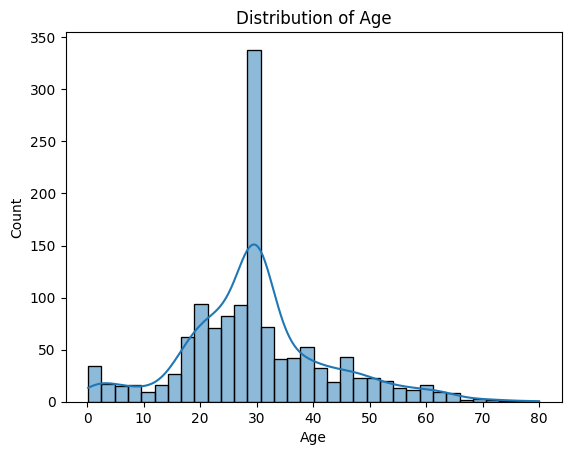

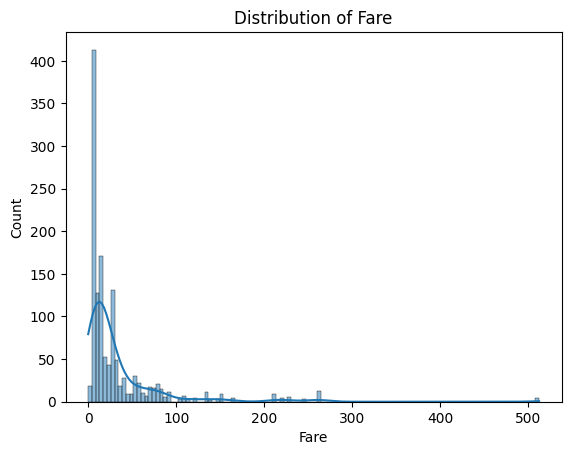

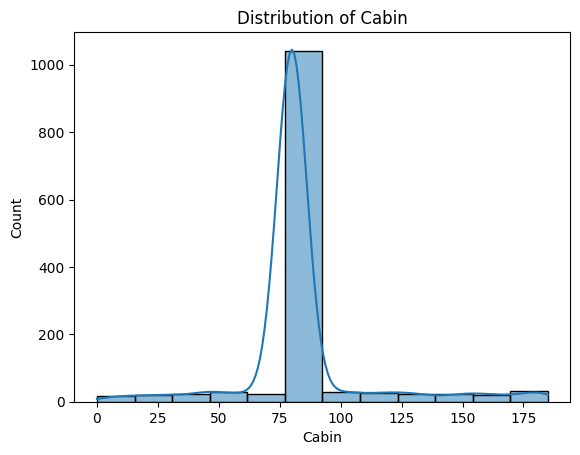

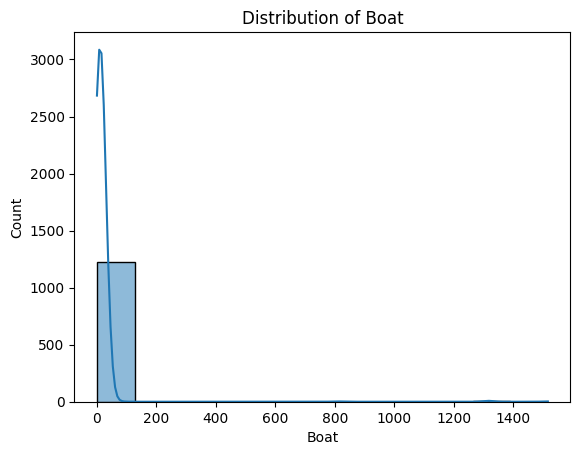

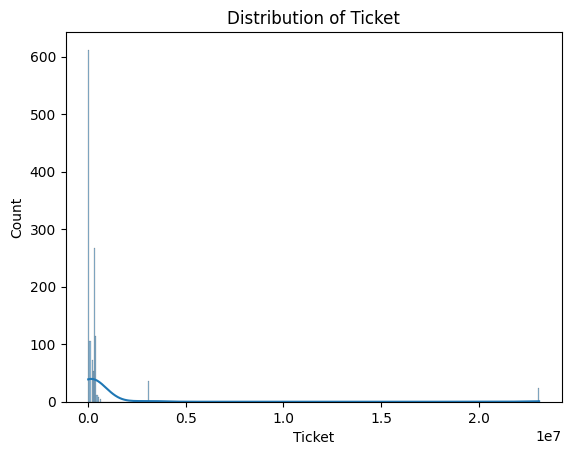

In [ ]:
# For Age Column
sns.histplot(df['age'], kde=True)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Distribution of Age')
plt.show()

# For Fare Column
sns.histplot(df['fare'], kde=True)
plt.xlabel('Fare')
plt.ylabel('Count')
plt.title('Distribution of Fare')
plt.show()

# For Cabin Column
sns.histplot(df['cabin'], kde=True)
plt.xlabel('Cabin')
plt.ylabel('Count')
plt.title('Distribution of Cabin')
plt.show()

# For Boat Column
sns.histplot(df['boat'], kde=True)
plt.xlabel('Boat')
plt.ylabel('Count')
plt.title('Distribution of Boat')
plt.show()

# For Ticket Column
sns.histplot(df['ticket'], kde=True)
plt.xlabel('Ticket')
plt.ylabel('Count')
plt.title('Distribution of Ticket')
plt.show()

## Box Plot of Age and Passenger Class.

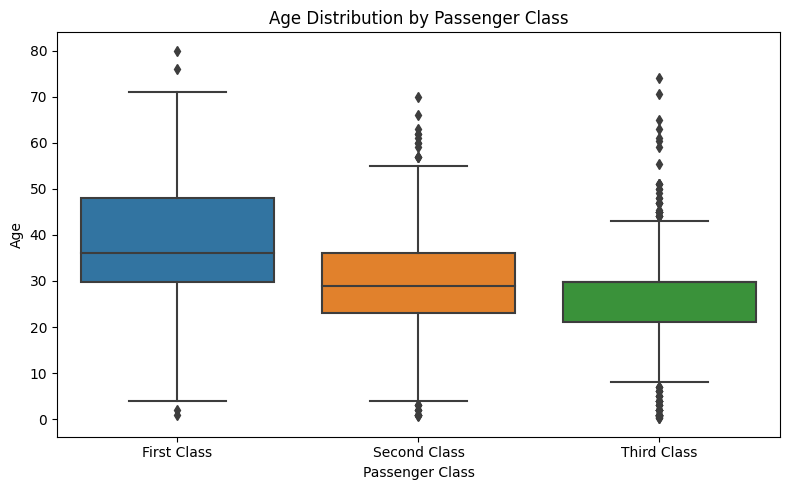

In [ ]:
# Set a larger figure size
plt.figure(figsize=(8, 5))

# Box plot for 'age'
sns.boxplot(x='pclass', y='age', data=df)

# Replacing x-axis ticks labels
plt.xticks([0, 1, 2], ['First Class', 'Second Class', 'Third Class'])
plt.xlabel('Passenger Class')

plt.ylabel('Age')
plt.title('Age Distribution by Passenger Class')

# Adjust layout
plt.tight_layout()

plt.show()

## Passenger Count according to Gender.

## Count of Males and Females who Onboarded the ship.

In [ ]:
# Counting occurrences of the Males category
count_for_category_0 = len(df[df['sex'] == 0])

# Display the result
print(f"Count for Males is: {count_for_category_0}")

# Counting occurrences of the Female category
count_for_category_1 = len(df[df['sex'] == 1])

# Display the result
print(f"\nCount for Females is: {count_for_category_1}")

Count for Males is: 843

Count for Females is: 466


## Bar Graph Showing Count of Males and Females who Onboarded the ship.

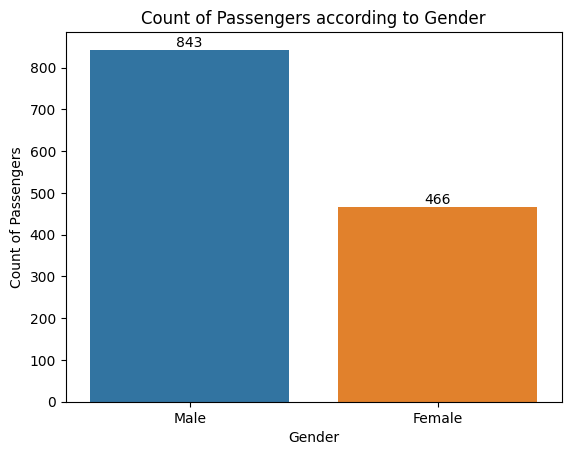

In [ ]:
# Using sum as the estimator to get counts
# ci stands for confidence intervals the lines on top of bars are errors bars which represent confidence levels of estimation
# Since we do not want it to be shown we set it to None
ax = sns.countplot(x='sex',data = df)

# Adding values to bars
for container in ax.containers:
    ax.bar_label(container)

# Replace x-axis tick labels
plt.xticks([0, 1], ['Male', 'Female'])

# Adding Labels
plt.xlabel("Gender")
plt.ylabel("Count of Passengers")
plt.title("Count of Passengers according to Gender")
plt.show()

## Survival Statistics according to Gender.

## Passenger Count according to Gender and Survival Statistics.

In [ ]:
# Counting occurrences of the Male category who didn't survived
Males_notSurvived = len(df[(df['sex'] == 0) & (df['survived'] == 0)])

# Counting occurrences of the Male category who survived
Males_Survived = len(df[(df['sex'] == 0) & (df['survived'] == 1)])

# Counting occurrences of the Female category who didn't survived
Females_notSurvived = len(df[(df['sex'] == 1) & (df['survived'] == 0)])

# Counting occurrences of the Female category who survived
Females_Survived = len(df[(df['sex'] == 1) & (df['survived'] == 1)])

# Displaying the result
print(f"Count for Males who didn't Survived is: {Males_notSurvived}")
print(f"\nCount for Males who Survived is: {Males_Survived}")
print(f"\nCount for Females who didn't Survived is: {Females_notSurvived}")
print(f"\nCount for Females who Survived is: {Females_Survived}")

Count for Males who didn't Survived is: 682

Count for Males who Survived is: 161

Count for Females who didn't Survived is: 127

Count for Females who Survived is: 339


## Bar Graph Showing Count of Males and Females Survived.

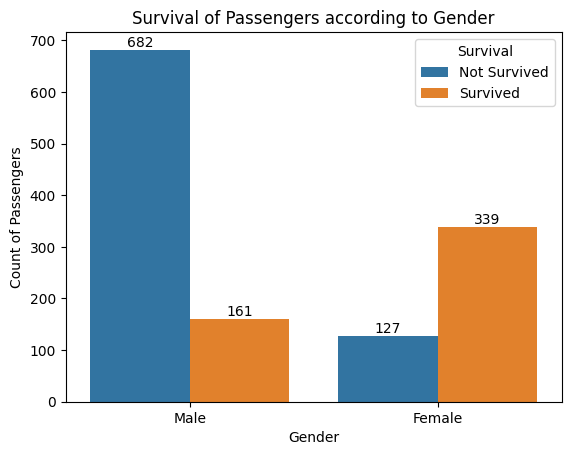

In [ ]:
# Using sum as the estimator to get counts
# ci stands for confidence intervals the lines on top of bars are errors bars which represent confidence levels of estimation
# Since we do not want it to be shown we set it to None
ax = sns.countplot(x='sex', data=df, hue = 'survived')

# Replace x-axis tick labels
plt.xticks([0, 1], ['Male', 'Female'])

# Adding values to bars
for container in ax.containers:
    ax.bar_label(container)

# Remove the default legend
ax.get_legend().remove()

# Adding Legend with new labels
plt.legend(title='Survival', loc='upper right', labels=['Not Survived','Survived'])

# Adding Labels
plt.xlabel("Gender")
plt.ylabel("Count of Passengers")
plt.title("Survival of Passengers according to Gender")
plt.show()

## Passenger Count according to Passenger Class.

In [ ]:
# Counting occurrences of the First Class category
count_for_category_1 = len(df[df['pclass'] == 1])

# Display the result
print(f"Count for First Class is: {count_for_category_1}")

# Counting occurrences of the Second Class category
count_for_category_2 = len(df[df['pclass'] == 2])

# Display the result
print(f"\nCount for Second Class is: {count_for_category_2}")

# Counting occurrences of the Third Class category
count_for_category_3 = len(df[df['pclass'] == 3])

# Display the result
print(f"\nCount for Third Class is: {count_for_category_3}")

Count for First Class is: 323

Count for Second Class is: 277

Count for Third Class is: 709


## Bar Graph Showing Count of Various Classes of Passengers who Onboarded the ship.

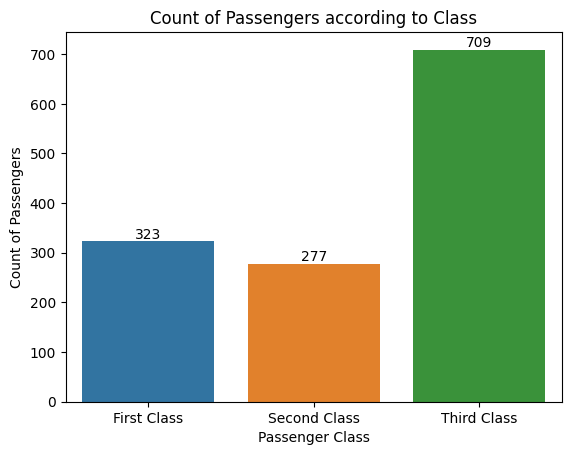

In [ ]:
class_Named = df['pclass'].map({1 : 'First Class', 2 : 'Second Class', 3 :'Third Class'})

ax = sns.countplot(x=class_Named)

# Adding values to bars
for container in ax.containers:
    ax.bar_label(container)

# Adding Labels
plt.xlabel("Passenger Class")
plt.ylabel("Count of Passengers")
plt.title("Count of Passengers according to Class")

plt.show()

## Passenger Count according to Passenger Class and Gender.

In [ ]:
# Counting passengers based on Passenger Class and Gender
passenger_counts = df.groupby(['pclass', 'sex']).size().reset_index(name='PassengerCount')

# Display the result
for index, row in passenger_counts.iterrows():
    print(f"Count for {('First' if row['pclass'] == 1 else 'Second' if row['pclass'] == 2 else 'Third')} Class {('Male' if row['sex'] == 0 else 'Female')} is: {row['PassengerCount']}")

Count for First Class Male is: 179
Count for First Class Female is: 144
Count for Second Class Male is: 171
Count for Second Class Female is: 106
Count for Third Class Male is: 493
Count for Third Class Female is: 216


## Bar Graph Showing Count of Various Classes of Passengers who Onboarded the ship along with the Gender.

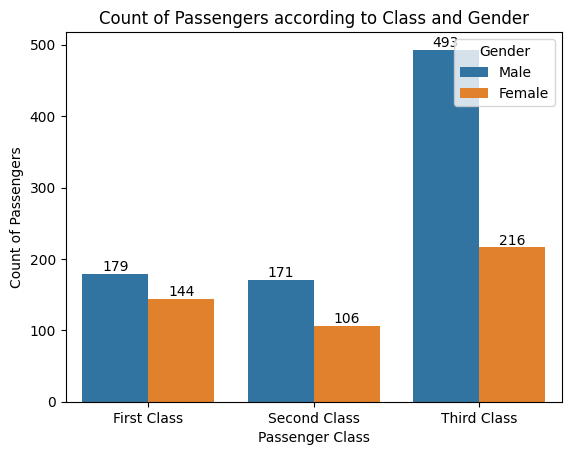

In [ ]:
class_Named = df['pclass'].map({1 : 'First Class', 2 : 'Second Class', 3 :'Third Class'})

ax = sns.countplot(x=class_Named, hue = 'sex', data = df)

# Adding values to bars
for container in ax.containers:
    ax.bar_label(container)

# Remove the default legend
ax.get_legend().remove()

# Adding Legend with new labels
plt.legend(title='Gender', loc='upper right', labels=['Male', 'Female'])

# Adding Labels
plt.xlabel("Passenger Class")
plt.ylabel("Count of Passengers")
plt.title("Count of Passengers according to Class and Gender")

plt.show()

## Survival Statistics according to Class Onboarded.

In [ ]:
# Counting passengers based on Passenger Class, Gender, and Survival
passenger_counts = df.groupby(['pclass', 'survived']).size().reset_index(name='PassengerCount')

# Display the result
for index, row in passenger_counts.iterrows():
    survival_status = 'Survived' if row['survived'] == 1 else 'Not Survived'
    print(f"Count for {('First' if row['pclass'] == 1 else 'Second' if row['pclass'] == 2 else 'Third')} Class {survival_status} is: {row['PassengerCount']}")

Count for First Class Not Survived is: 123
Count for First Class Survived is: 200
Count for Second Class Not Survived is: 158
Count for Second Class Survived is: 119
Count for Third Class Not Survived is: 528
Count for Third Class Survived is: 181


## Bar Plot Showing Survival of Passengers according to Gender and Class Onboarded.

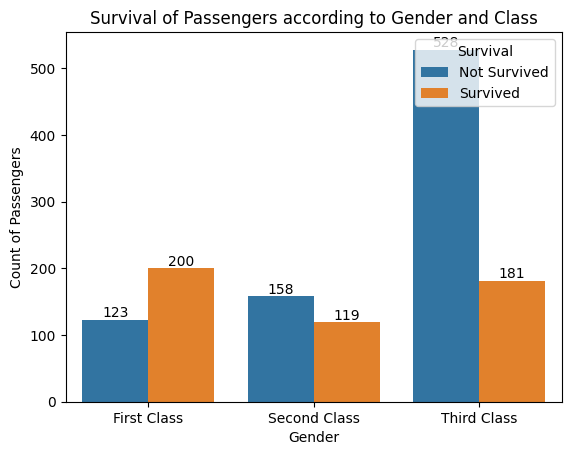

In [ ]:
class_Named = df['pclass'].map({1 : 'First Class', 2 : 'Second Class', 3 :'Third Class'})

ax = sns.countplot(x=class_Named, data=df, hue = 'survived')

# Adding values to bars
for container in ax.containers:
    ax.bar_label(container)

# Remove the default legend
ax.get_legend().remove()

# Adding Legend with new labels
plt.legend(title='Survival', loc='upper right', labels=['Not Survived','Survived'])

# Adding Labels
plt.xlabel("Gender")
plt.ylabel("Count of Passengers")
plt.title("Survival of Passengers according to Gender and Class")
plt.show()

## Passenger Count according to Gender and Class and Survival Statistics.

In [ ]:
# Counting passengers based on Passenger Class, Gender, and Survival
passenger_counts = df.groupby(['pclass', 'sex', 'survived']).size().reset_index(name='PassengerCount')

# Display the result
for index, row in passenger_counts.iterrows():
    survival_status = 'Survived' if row['survived'] == 1 else 'Not Survived'
    print(f"Count for {('First' if row['pclass'] == 1 else 'Second' if row['pclass'] == 2 else 'Third')} Class {('Male' if row['sex'] == 0 else 'Female')} {survival_status} is: {row['PassengerCount']}")

Count for First Class Male Not Survived is: 118
Count for First Class Male Survived is: 61
Count for First Class Female Not Survived is: 5
Count for First Class Female Survived is: 139
Count for Second Class Male Not Survived is: 146
Count for Second Class Male Survived is: 25
Count for Second Class Female Not Survived is: 12
Count for Second Class Female Survived is: 94
Count for Third Class Male Not Survived is: 418
Count for Third Class Male Survived is: 75
Count for Third Class Female Not Survived is: 110
Count for Third Class Female Survived is: 106


## Bar Graph Showing Count of Males and Females Survived according to Class Onboarded.

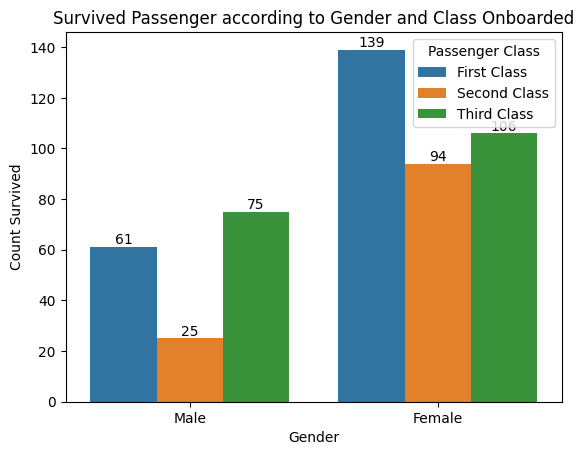

In [ ]:
# Using sum as the estimator to get counts
ax = sns.barplot(x='sex', y='survived', data=df, estimator=sum, hue = 'pclass', ci = None)

# Replace x-axis tick labels
plt.xticks([0, 1], ['Male', 'Female'])

# Remove the default legend
ax.get_legend().remove()

# Adding Legend with new labels
plt.legend(title='Passenger Class', loc='upper right', labels=['First Class', 'Second Class', 'Third Class'])


# Adding Values to Bars
for cont in ax.containers:
  ax.bar_label(cont)

# Adding Labels
plt.xlabel("Gender")
plt.ylabel("Count Survived")
plt.title("Survived Passenger according to Gender and Class Onboarded")
plt.show()

## Another Method of Adding Labels is creating a new Dataframe with decided labels and then using it for Plotting.

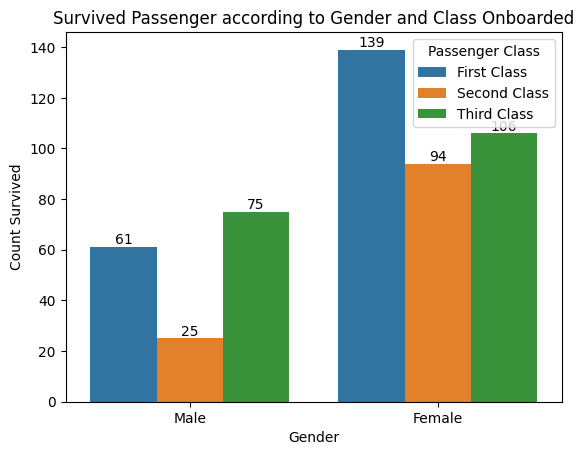

In [ ]:
gender_Named = df['sex'].map({0: 'Male', 1: 'Female'})

class_Named = df['pclass'].map({1 : 'First Class', 2 : 'Second Class', 3 :'Third Class'})

survived = df['survived']

new_df = pd.DataFrame({'Gender' : gender_Named, 'Class': class_Named, 'survived' : survived })

# Specify the order of the 'Gender' variable
gender_order = ['Male', 'Female']

# Using sum as the estimator to get counts
ax = sns.barplot(x='Gender', y='survived', data=new_df, estimator=sum, hue='Class', order=gender_order, ci = None)

# Adding Values to Bars
for cont in ax.containers:
  ax.bar_label(cont)

# Adding Legend
plt.legend(title='Passenger Class', loc='upper right')

# Adding Labels
plt.xlabel("Gender")
plt.ylabel("Count Survived")
plt.title("Survived Passenger according to Gender and Class Onboarded")
plt.show()

## Seeing the Count of Survival of passenger according to title.

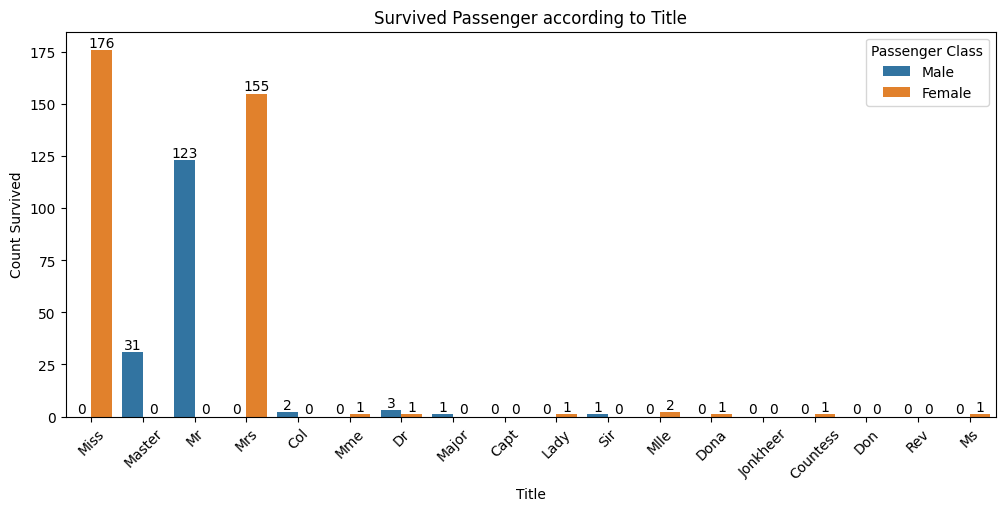

In [ ]:
# Setting the Size of Figure
plt.figure(figsize = (12,5))

# Using sum as the estimator to get counts
ax = sns.barplot(x='title', y='survived', data=df, estimator=sum, hue = 'sex', ci = None)

# Adding Values to Bars
for cont in ax.containers:
  ax.bar_label(cont)

# Remove the default legend
ax.get_legend().remove()

# Adding Legend with new labels
plt.legend(title='Passenger Class', loc='upper right', labels=['Male', 'Female'])

# Adding Labels
plt.xlabel("Title")

plt.xticks(rotation = 45)
plt.ylabel("Count Survived")
plt.title("Survived Passenger according to Title")
plt.show()

## Embarked Ports

### In case of Titanic dataset, the 'embarked' or 'embarkation' column may indicate the port at which a passenger boarded the Titanic. The common values for this column are often represented by letters such as 'C' for Cherbourg, 'Q' for Queenstown (now known as Cobh), and 'S' for Southampton, which were the three ports involved in the Titanic's maiden voyage in 1912.

These codes represent the different ports from which passengers boarded the Titanic during its maiden voyage in 1912. Each letter corresponds to a specific port:

- **Cherbourg (C)**: Cherbourg-Octeville is a port city in northwestern France.
- **Queenstown (Q)**: Queenstown (Cobh) is a port town in County Cork, Ireland.
- **Southampton (S)**: Southampton is a major port city on the south coast of England.

## Passenger Count

## Bar Graph Showing Count of Various Embarked Ports of Passengers who Onboarded the ship.

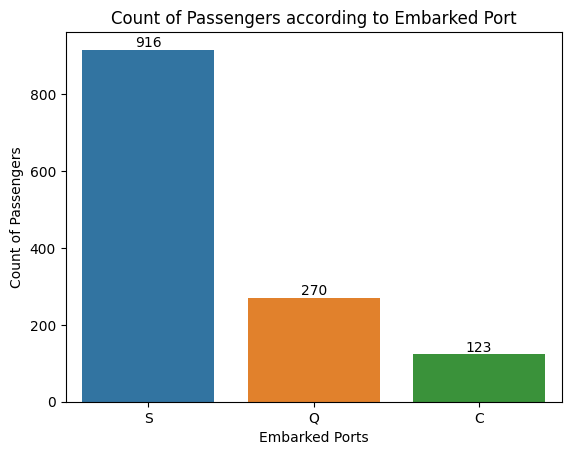

In [ ]:
port_Named = df['embarked'].map({0: 'S', 1 : "Q", 2 : 'C'})

ax = sns.countplot(x=port_Named)

# Adding values to bars
for container in ax.containers:
    ax.bar_label(container)

# Adding Labels
plt.xlabel("Embarked Ports")
plt.ylabel("Count of Passengers")
plt.title("Count of Passengers according to Embarked Port")

plt.show()

## Bar Graph Showing Count of Various Embarked Ports of Passengers who Onboarded the ship according to Gender.

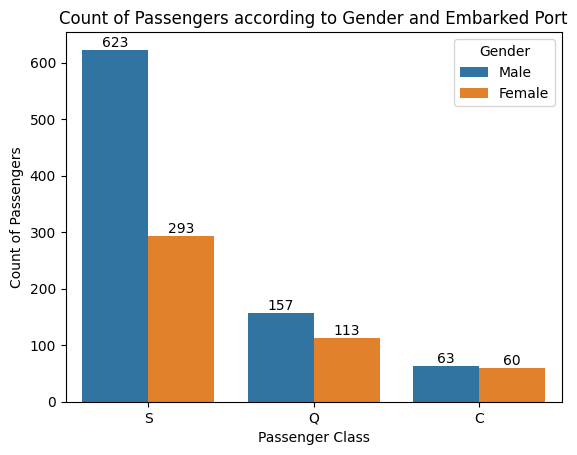

In [ ]:
port_Named = df['embarked'].map({0: 'S', 1 : "Q", 2 : 'C'})

ax = sns.countplot(x=port_Named, hue = 'sex', data = df)

# Adding values to bars
for container in ax.containers:
    ax.bar_label(container)

# Remove the default legend
ax.get_legend().remove()

# Adding Legend with new labels
plt.legend(title='Gender', loc='upper right', labels=['Male', 'Female'])

# Adding Labels
plt.xlabel("Passenger Class")
plt.ylabel("Count of Passengers")
plt.title("Count of Passengers according to Gender and Embarked Port")

plt.show()

## Bar Graph Showing Count of Various Embarked Ports of Passengers who Onboarded the ship according to Class.

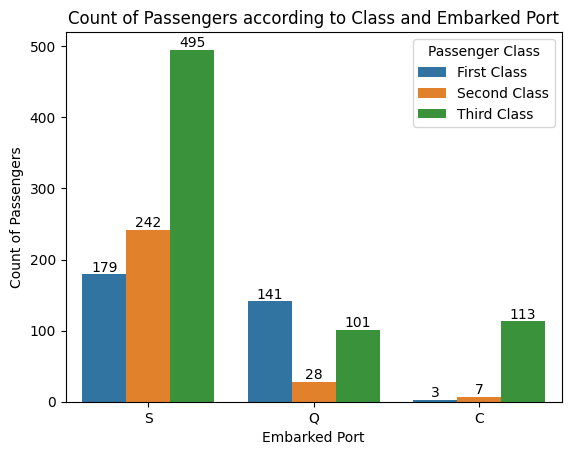

In [ ]:
port_Named = df['embarked'].map({0: 'S', 1 : "Q", 2 : 'C'})

ax = sns.countplot(x=port_Named, hue = 'pclass', data = df)

# Adding values to bars
for container in ax.containers:
    ax.bar_label(container)

# Remove the default legend
ax.get_legend().remove()

# Adding Legend with new labels
plt.legend(title='Passenger Class', loc='upper right', labels=['First Class', 'Second Class', 'Third Class'])

# Adding Labels
plt.xlabel("Embarked Port")
plt.ylabel("Count of Passengers")
plt.title("Count of Passengers according to Class and Embarked Port")

plt.show()

## Survival Statistics
## Bar Graph Showing Count of Classes of Passengers Survived according to Embarked ports.

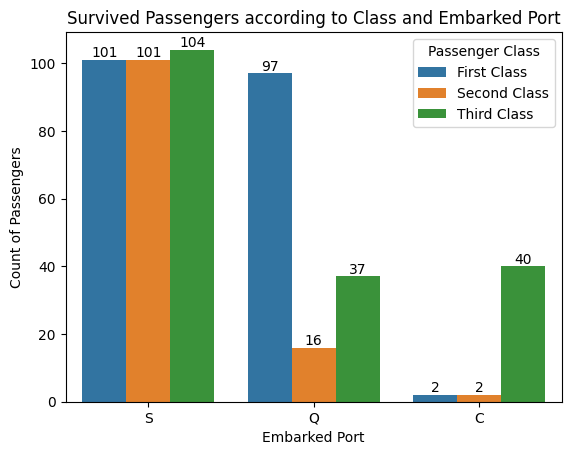

In [ ]:
port_Named = df['embarked'].map({0: 'S', 1 : "Q", 2 : 'C'})

ax = sns.barplot(x=port_Named,y='survived', hue = 'pclass', data = df,estimator=sum,ci = None)

# Adding values to bars
for container in ax.containers:
    ax.bar_label(container)

# Remove the default legend
ax.get_legend().remove()

# Adding Legend with new labels
plt.legend(title='Passenger Class', loc='upper right', labels=['First Class', 'Second Class', 'Third Class'])

# Adding Labels
plt.xlabel("Embarked Port")
plt.ylabel("Count of Passengers")
plt.title("Survived Passengers according to Class and Embarked Port")

plt.show()

## Bar Graph Showing Count of Males and Females Survived according to Embarked ports.

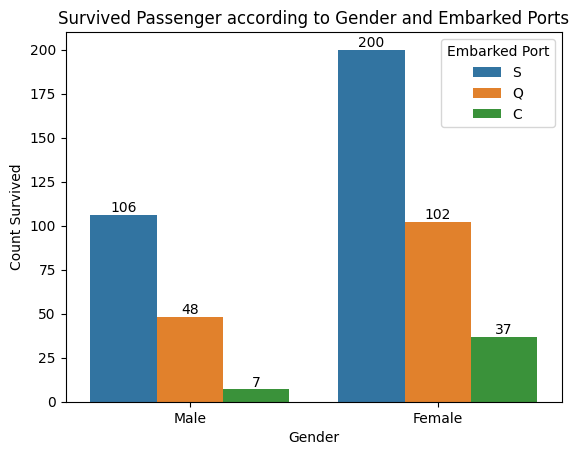

In [ ]:
# Using sum as the estimator to get counts
# ci stands for confidence intervals the lines on top of bars are errors bars which represent confidence levels of estimation
# Since we do not want it to be shown we set it to None
ax = sns.barplot(x='sex', y='survived', data=df, estimator=sum,ci = None, hue = 'embarked')

# Replace x-axis tick labels
plt.xticks([0, 1], ['Male', 'Female'])

# Adding values to bars
for container in ax.containers:
    ax.bar_label(container)

# Remove the default legend
ax.get_legend().remove()

# Adding Labels
plt.xlabel("Gender")
plt.ylabel("Count Survived")
# Adding Legend with new labels
plt.legend(title='Embarked Port', labels= ['S', "Q", 'C'])
plt.title("Survived Passenger according to Gender and Embarked Ports")
plt.show()

## Columns sibsp and parch

In the Titanic dataset, the columns "Parch" and "SibSp" represent information about the passengers' family relationships on board.

1. **Parch (Parent/Child):**
   - Parch refers to the number of parents or children a passenger had on board.
   - The term "parent" includes both mothers and fathers.
   - The term "child" includes both sons and daughters.
   - This column indicates the family relationships related to parents or children.

2. **SibSp (Sibling/Spouse):**
   - SibSp refers to the number of siblings or spouses a passenger had on board.
   - The term "sibling" includes brothers and sisters.
   - The term "spouse" includes husbands and wives.
   - This column indicates the family relationships related to siblings or spouses.

For example:
- If a passenger had a Parch value of 1, it means the passenger had one parent or child on board.
- If a passenger had a SibSp value of 2, it means the passenger had two siblings or spouses on board.

These columns provide insights into the family structure of passengers on the Titanic and can be used to analyze the impact of family size on survival rates.

## Passenger Count

In [ ]:
# Seeing Number of Unique Category in Column parch
print("Number of Unique Category in Column Parch is:\n")
print(df['parch'].value_counts())

Number of Unique Category in Column Parch is:

0    1002
1     170
2     113
3       8
4       6
5       6
6       2
9       2
Name: parch, dtype: int64


## Visualizing the number of Passengers with Parents and Childern onboard.

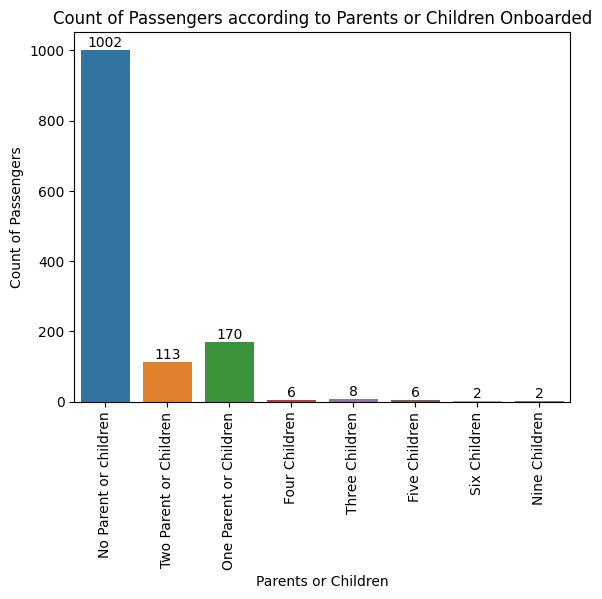

In [ ]:
parch_Named = df['parch'].map({0: 'No Parent or children',
    1: 'One Parent or Children',
    2: 'Two Parent or Children',
    3: 'Three Children',
    4: 'Four Children',
    5: 'Five Children',
    6: 'Six Children',
    9: 'Nine Children',})

ax = sns.countplot(x=parch_Named)

# Adding values to bars
for container in ax.containers:
    ax.bar_label(container)

# Adding Labels
plt.xlabel("Parents or Children")
plt.xticks(rotation = 90)
plt.ylabel("Count of Passengers")
plt.title("Count of Passengers according to Parents or Children Onboarded")

plt.show()

## Visualizing the number of Passengers with Parents and Childern onboard according to Gender.

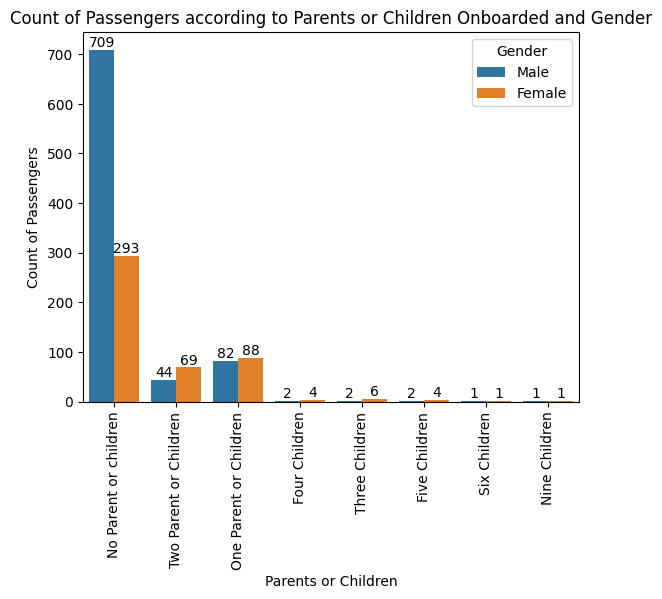

In [ ]:
ax = sns.countplot(x=parch_Named, hue = 'sex', data = df)

# Adding values to bars
for container in ax.containers:
    ax.bar_label(container)

# Adding Labels
plt.xlabel("Parents or Children")
plt.xticks(rotation = 90)
# Remove the default legend
ax.get_legend().remove()

# Adding Legend with new labels
plt.legend(title='Gender', loc='upper right', labels=['Male', 'Female'])
plt.ylabel("Count of Passengers")
plt.title("Count of Passengers according to Parents or Children Onboarded and Gender")

plt.show()

## Survival Statistics

## Visualizing the number of Passengers with Parents and Childern onboard according to Survived.

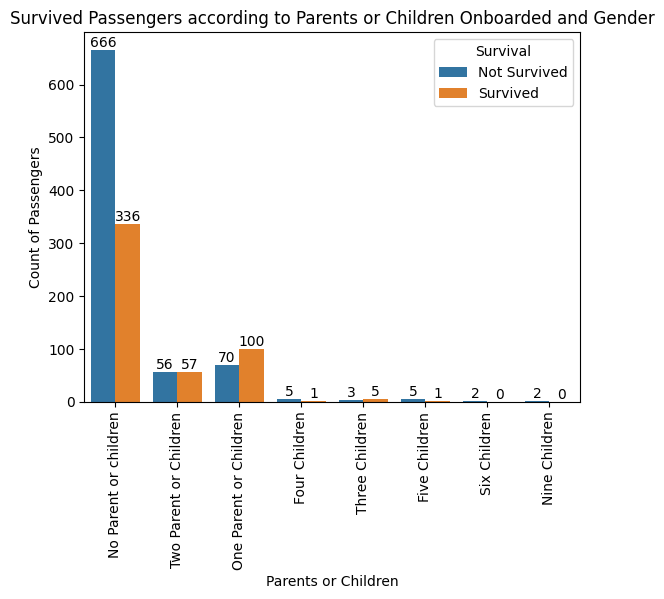

In [ ]:
ax = sns.countplot(x=parch_Named, hue = 'survived', data = df)

# Adding values to bars
for container in ax.containers:
    ax.bar_label(container)

# Adding Labels
plt.xlabel("Parents or Children")
plt.xticks(rotation = 90)
# Remove the default legend
ax.get_legend().remove()

# Adding Legend with new labels
# Adding Legend with new labels
plt.legend(title='Survival', loc='upper right', labels=['Not Survived','Survived'])
plt.ylabel("Count of Passengers")
plt.title("Survived Passengers according to Parents or Children Onboarded and Gender")

plt.show()

## Visualizing the number of Passengers Survived with Parents and Childern onboard according to Class.

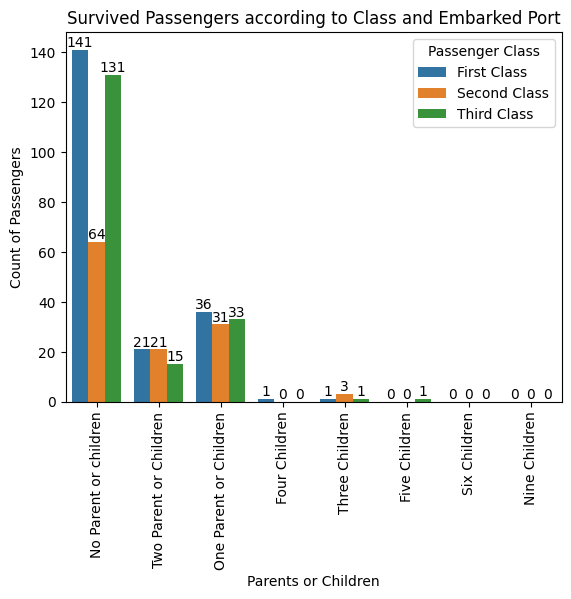

In [ ]:
ax = sns.barplot(x=parch_Named,y='survived', hue = 'pclass', data = df,estimator=sum,ci = None)

# Adding values to bars
for container in ax.containers:
    ax.bar_label(container)

# Remove the default legend
ax.get_legend().remove()

# Adding Legend with new labels
plt.legend(title='Passenger Class', loc='upper right', labels=['First Class', 'Second Class', 'Third Class'])

# Adding Labels
plt.xlabel("Parents or Children")
plt.ylabel("Count of Passengers")
plt.title("Survived Passengers according to Class and Embarked Port")
plt.xticks(rotation = 90)
plt.show()

## Visualizing the number of Passengers Survived with Parents and Childern onboard according to Gender.

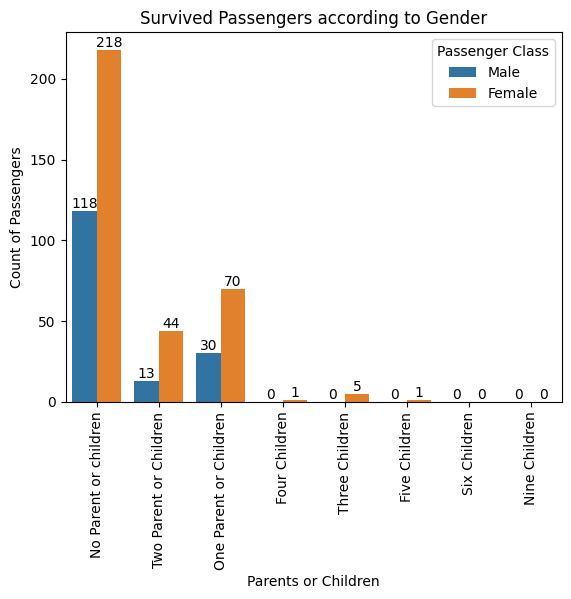

In [ ]:
ax = sns.barplot(x=parch_Named,y='survived', hue = 'sex', data = df,estimator=sum,ci = None)

# Adding values to bars
for container in ax.containers:
    ax.bar_label(container)

# Remove the default legend
ax.get_legend().remove()

# Adding Legend with new labels
plt.legend(title='Passenger Class', loc='upper right', labels=['Male', 'Female'])

# Adding Labels
plt.xlabel("Parents or Children")
plt.ylabel("Count of Passengers")
plt.title("Survived Passengers according to Gender")
plt.xticks(rotation = 90)
plt.show()

## Passenger Count for Column Sibsp.

In [ ]:
# Seeing Number of Unique Category in Column Sibsp
print("Number of Unique Category in Column Sibsp is:\n")
print(df['sibsp'].value_counts())

Number of Unique Category in Column Sibsp is:

0    891
1    319
2     42
4     22
3     20
8      9
5      6
Name: sibsp, dtype: int64


## Visualizing the number of Passengers with Siblings or Spouses onboard.

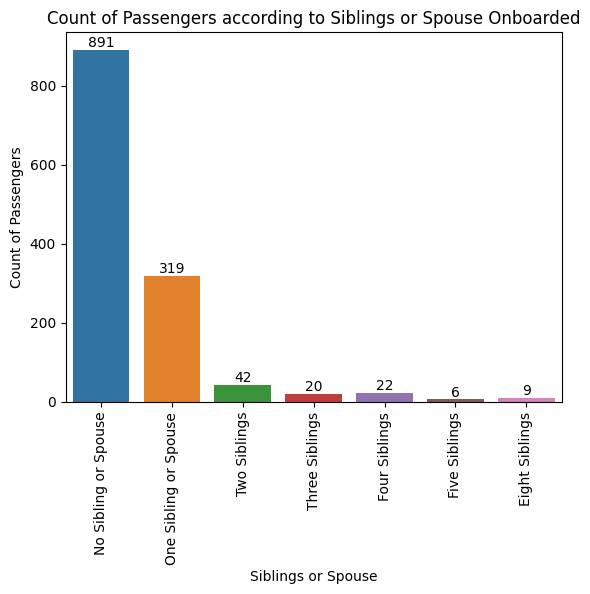

In [ ]:
sibsp_Named = df['sibsp'].map({0: 'No Sibling or Spouse',
    1: 'One Sibling or Spouse',
    2: 'Two Siblings',
    3: 'Three Siblings',
    4: 'Four Siblings',
    5: 'Five Siblings',
    8: 'Eight Siblings',})

ax = sns.countplot(x=sibsp_Named)

# Adding values to bars
for container in ax.containers:
    ax.bar_label(container)

# Adding Labels
plt.xlabel("Siblings or Spouse")
plt.xticks(rotation = 90)
plt.ylabel("Count of Passengers")
plt.title("Count of Passengers according to Siblings or Spouse Onboarded")

plt.show()

## Visualizing the number of Passengers with Parents and Childern onboard according to Gender.

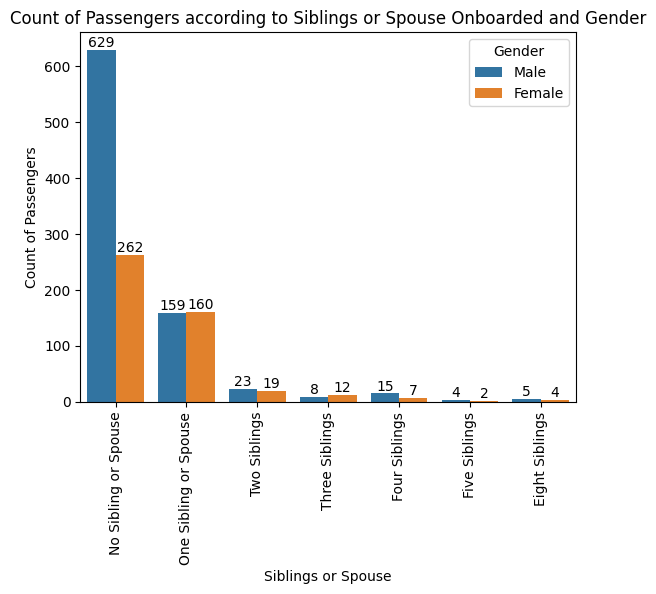

In [ ]:
ax = sns.countplot(x=sibsp_Named, hue = 'sex', data = df)

# Adding values to bars
for container in ax.containers:
    ax.bar_label(container)

# Adding Labels
plt.xlabel("Siblings or Spouse")
plt.xticks(rotation = 90)
# Remove the default legend
ax.get_legend().remove()

# Adding Legend with new labels
plt.legend(title='Gender', loc='upper right', labels=['Male', 'Female'])
plt.ylabel("Count of Passengers")
plt.title("Count of Passengers according to Siblings or Spouse Onboarded and Gender")

plt.show()

## Survival Statistics

## Visualizing the number of Passengers with Parents and Childern onboard according to Survived.

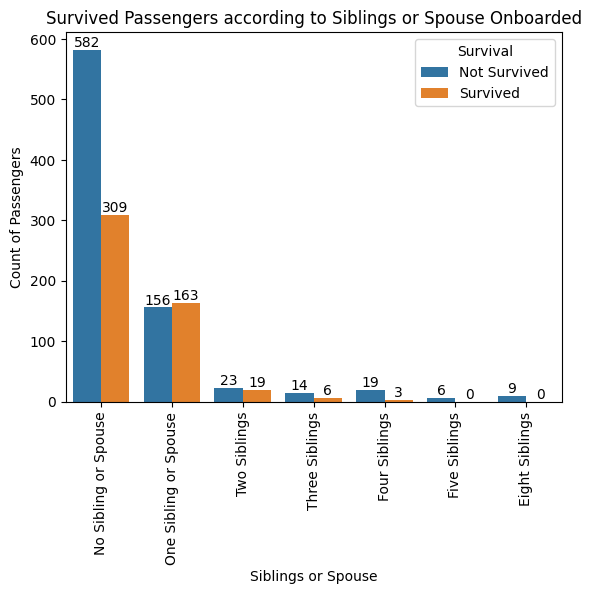

In [ ]:
ax = sns.countplot(x=sibsp_Named, hue = 'survived', data = df)

# Adding values to bars
for container in ax.containers:
    ax.bar_label(container)

# Adding Labels
plt.xlabel("Siblings or Spouse")
plt.xticks(rotation = 90)
# Remove the default legend
ax.get_legend().remove()

# Adding Legend with new labels
# Adding Legend with new labels
plt.legend(title='Survival', loc='upper right', labels=['Not Survived','Survived'])
plt.ylabel("Count of Passengers")
plt.title("Survived Passengers according to Siblings or Spouse Onboarded")

plt.show()

## Visualizing the number of Passengers Survived with Parents and Childern onboard according to Class.

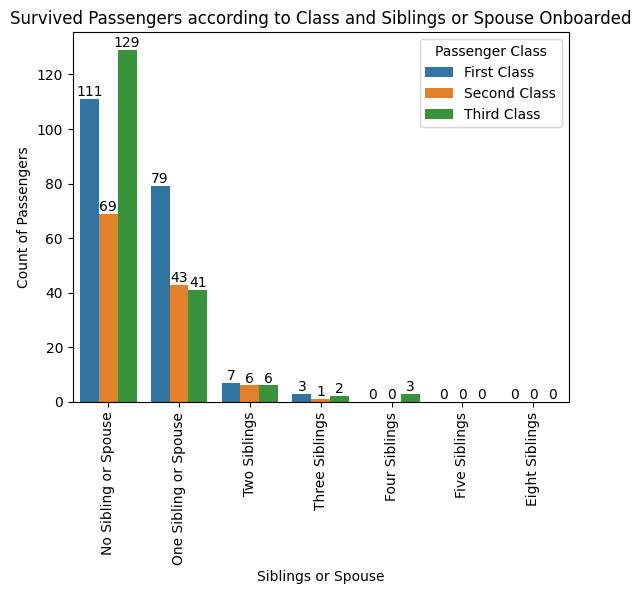

In [ ]:
ax = sns.barplot(x=sibsp_Named,y='survived', hue = 'pclass', data = df,estimator=sum,ci = None)

# Adding values to bars
for container in ax.containers:
    ax.bar_label(container)

# Remove the default legend
ax.get_legend().remove()

# Adding Legend with new labels
plt.legend(title='Passenger Class', loc='upper right', labels=['First Class', 'Second Class', 'Third Class'])

# Adding Labels
plt.xlabel("Siblings or Spouse")
plt.ylabel("Count of Passengers")
plt.title("Survived Passengers according to Class and Siblings or Spouse Onboarded")
plt.xticks(rotation = 90)
plt.show()

## Visualizing the number of Passengers Survived with Siblings or Spouse  onboarded according to Gender.

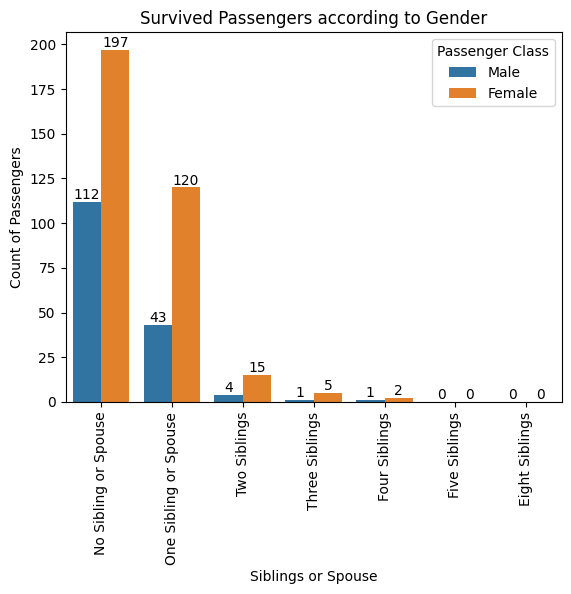

In [ ]:
ax = sns.barplot(x=sibsp_Named,y='survived', hue = 'sex', data = df,estimator=sum,ci = None)

# Adding values to bars
for container in ax.containers:
    ax.bar_label(container)

# Remove the default legend
ax.get_legend().remove()

# Adding Legend with new labels
plt.legend(title='Passenger Class', loc='upper right', labels=['Male', 'Female'])

# Adding Labels
plt.xlabel("Siblings or Spouse")
plt.ylabel("Count of Passengers")
plt.title("Survived Passengers according to Gender")
plt.xticks(rotation = 90)
plt.show()

## Visualization for Home Destination Column

In [ ]:
# Seeing Number of Unique Category in Column Home Destination
print("Unique Categories in Column Home Destination is:\n")
print(df['home.dest'].value_counts())
print("\nNumber of Unique Category in Column Home Destination is:\n")
print(df['home.dest'].nunique())  # Use nunique() to get the number of unique values

# Filter the DataFrame based on the condition
counts = df['home.dest'].value_counts()
categories_to_keep = counts[counts >= 9].index
df_filtered = df[df['home.dest'].isin(categories_to_keep)]

# Seeing Number of Unique Category in Column Home Destination
print("Unique Categories in Column Home Destination after Filtering is:\n")
print(df_filtered['home.dest'].value_counts())
print("\nNumber of Unique Category in Column Home Destination after Filtering is:\n")
print(df_filtered['home.dest'].nunique())

Unique Categories in Column Home Destination is:

New York, NY                                    628
London                                           14
Montreal, PQ                                     10
Paris, France                                     9
Cornwall / Akron, OH                              9
                                               ... 
Chelsea, London                                   1
Harrow-on-the-Hill, Middlesex                     1
Copenhagen, Denmark                               1
Guernsey / Montclair, NJ and/or Toledo, Ohio      1
Antwerp, Belgium / Stanton, OH                    1
Name: home.dest, Length: 369, dtype: int64

Number of Unique Category in Column Home Destination is:

369
Unique Categories in Column Home Destination after Filtering is:

New York, NY            628
London                   14
Montreal, PQ             10
Paris, France             9
Cornwall / Akron, OH      9
Name: home.dest, dtype: int64

Number of Unique Category in Column

## Seeing Passenger Count for Home Destination Column.

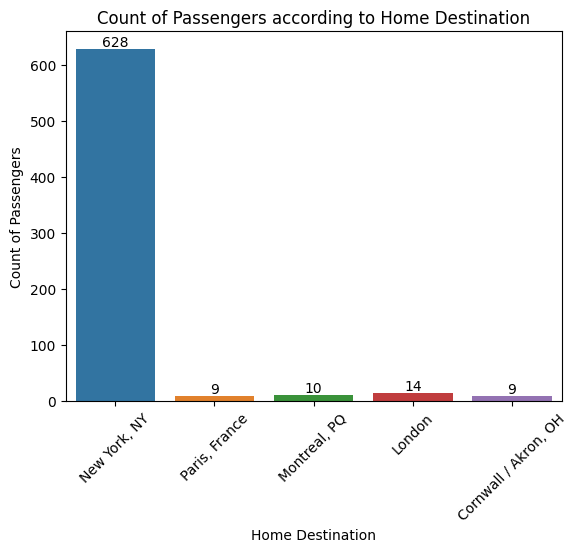

In [ ]:
ax = sns.countplot(x = 'home.dest', data =df_filtered)

# Adding values to bars
for container in ax.containers:
    ax.bar_label(container)

plt.xlabel("Home Destination")
plt.xticks(rotation = 45)
plt.ylabel("Count of Passengers")
plt.title("Count of Passengers according to Home Destination")

plt.show()

## Seeing Passenger Count for Home Destination Column and Gender.

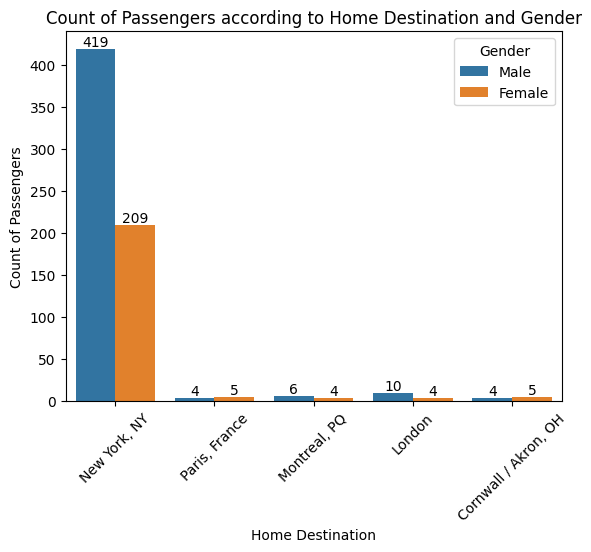

In [ ]:
ax = sns.countplot(x = 'home.dest', hue = 'sex', data =df_filtered)

# Adding values to bars
for container in ax.containers:
    ax.bar_label(container)
# Remove the default legend
ax.get_legend().remove()

# Adding Legend with new labels
plt.legend(title='Gender', loc='upper right', labels=['Male', 'Female'])

plt.xlabel("Home Destination")
plt.xticks(rotation = 45)
plt.ylabel("Count of Passengers")
plt.title("Count of Passengers according to Home Destination and Gender")

plt.show()

## Seeing Passenger Count for Home Destination Column and Class.

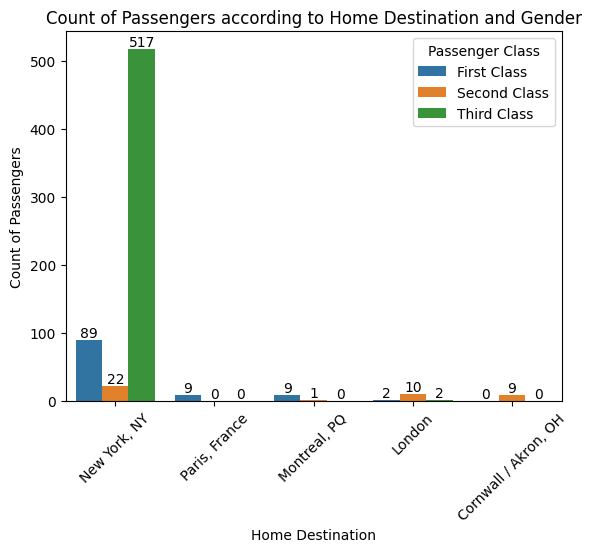

In [ ]:
ax = sns.countplot(x = 'home.dest', hue = 'pclass', data =df_filtered)

# Adding values to bars
for container in ax.containers:
    ax.bar_label(container)
# Remove the default legend
ax.get_legend().remove()

# Adding Legend with new labels
plt.legend(title='Passenger Class', loc='upper right', labels=['First Class', 'Second Class', 'Third Class'])


plt.xlabel("Home Destination")
plt.xticks(rotation = 45)
plt.ylabel("Count of Passengers")
plt.title("Count of Passengers according to Home Destination and Gender")

plt.show()

## Visualizing Pair Plot for this dataset with Survived as the Hue parameter.

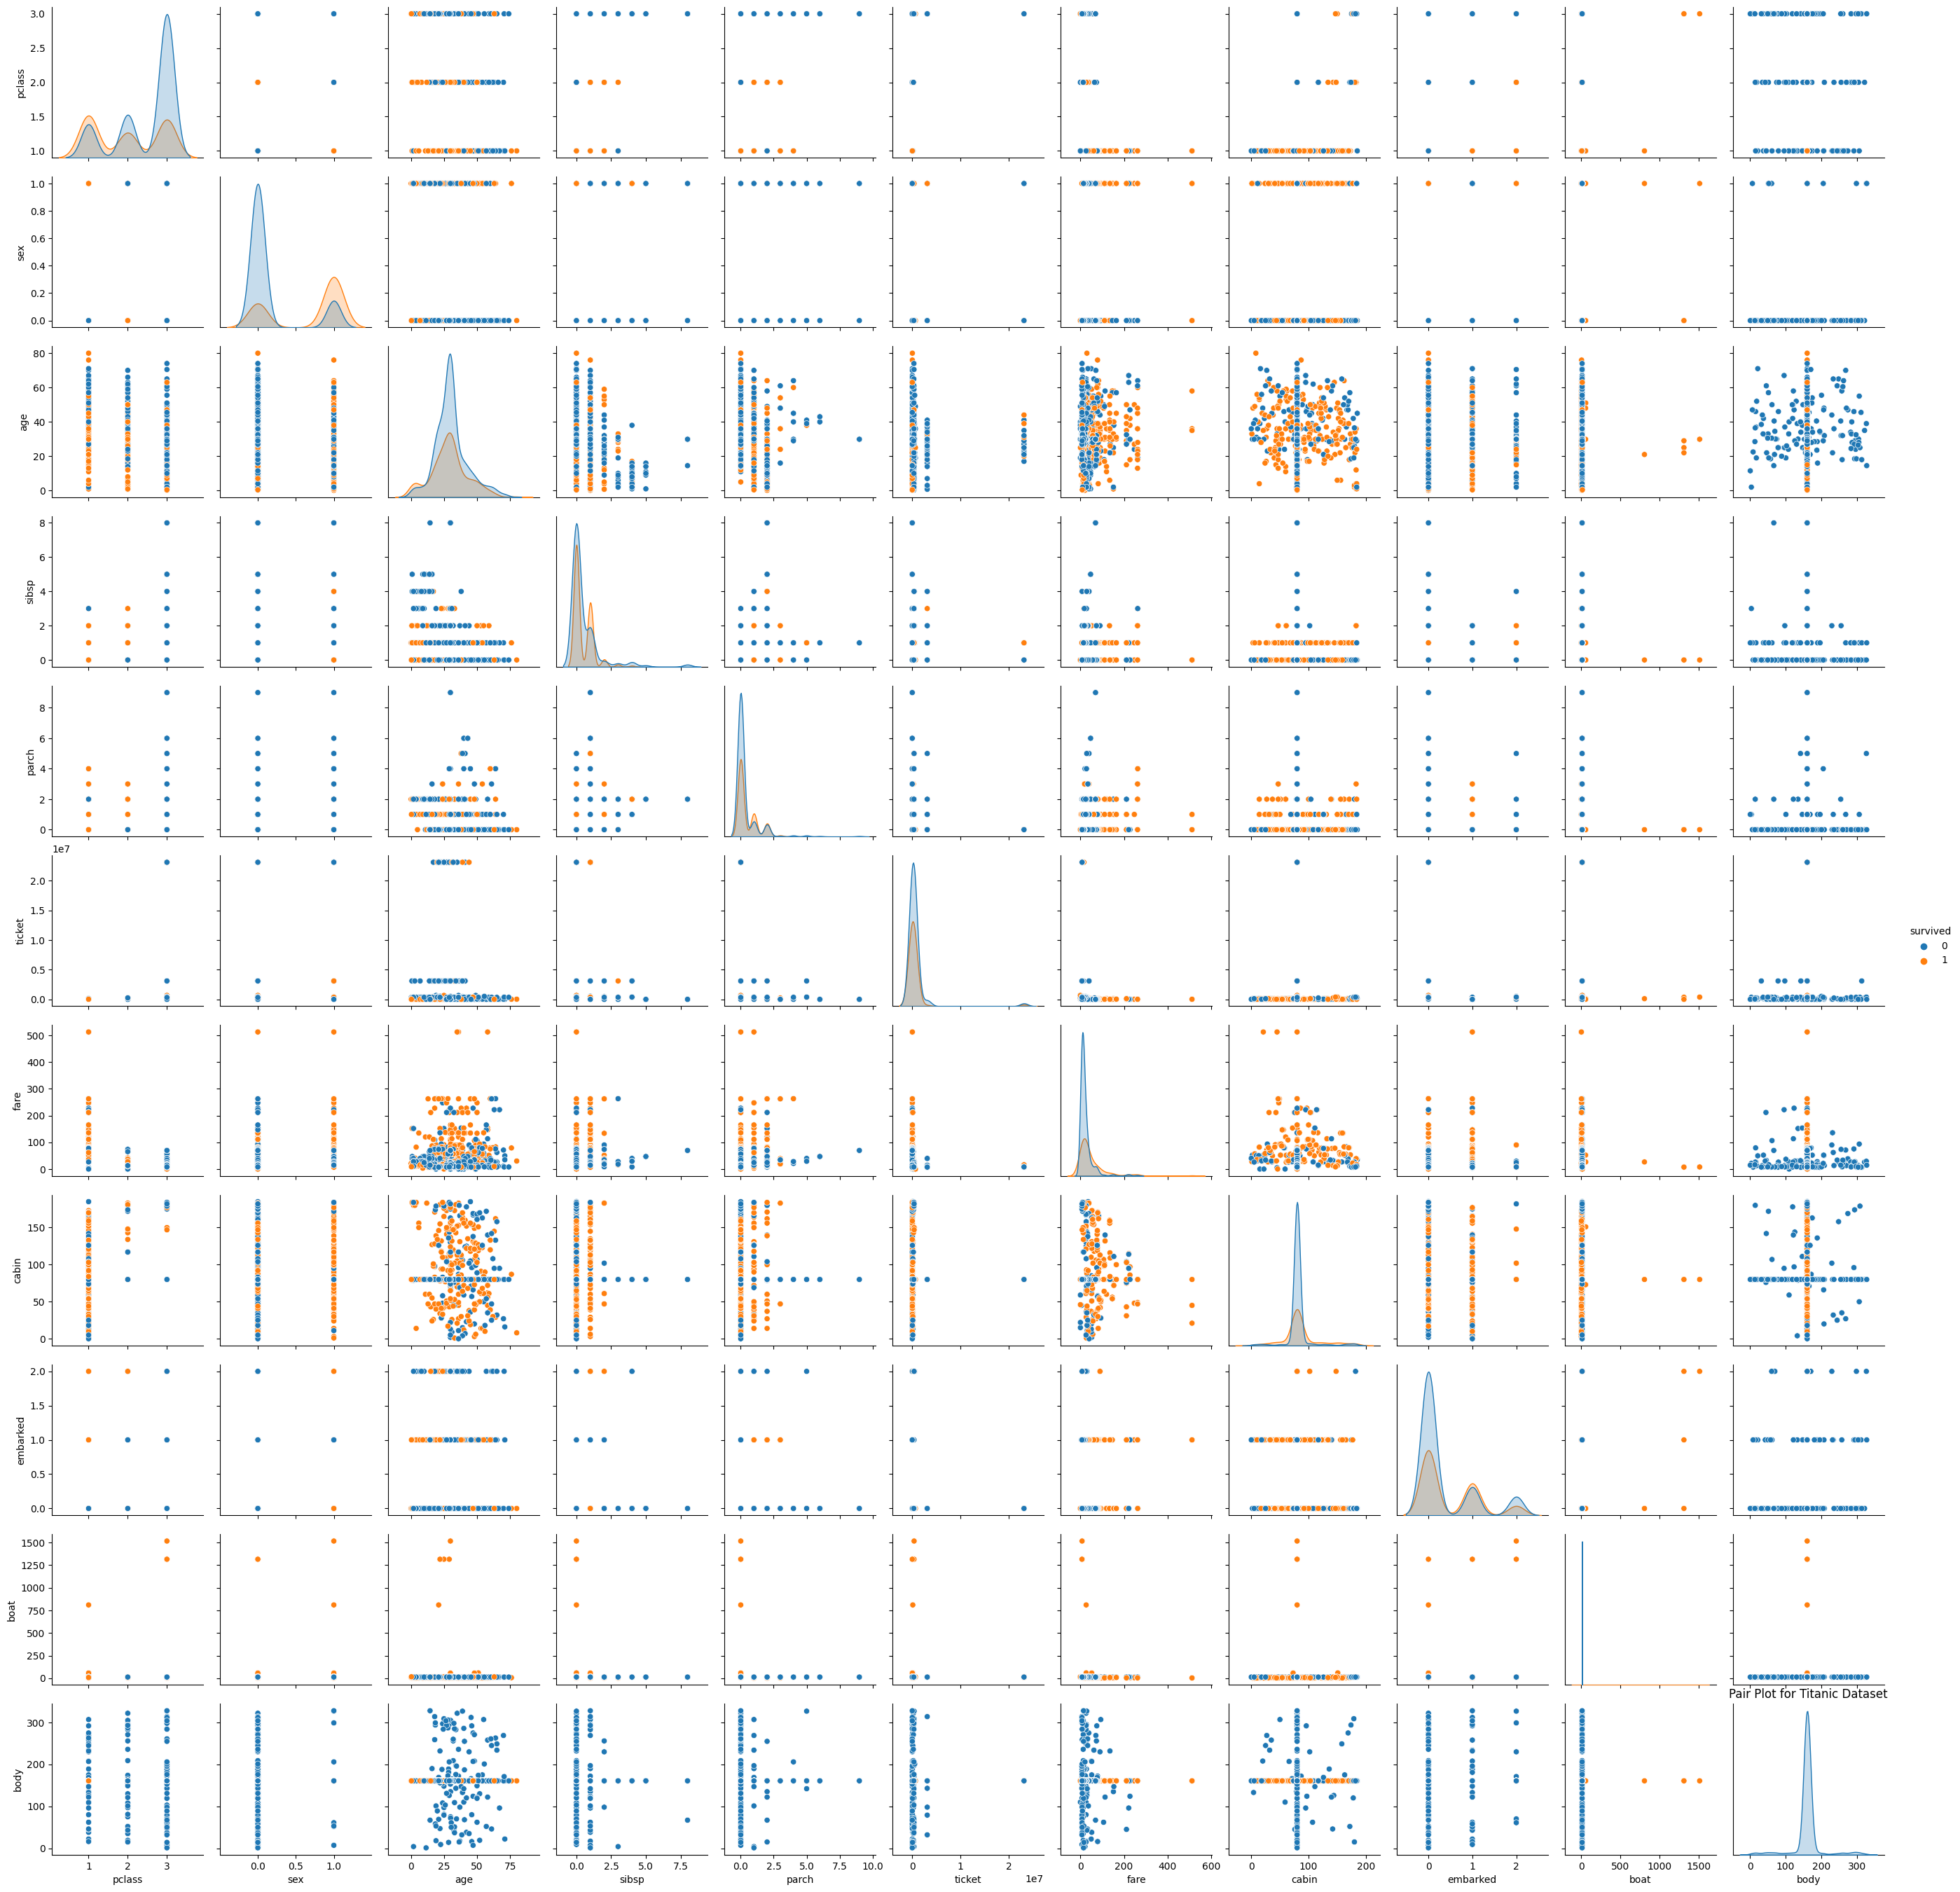

In [ ]:
sns.pairplot(df, hue = 'survived')

plt.title("Pair Plot for Titanic Dataset")
plt.show()

## Visualizing Categorical Columns of this dataset with Survived as the Hue parameter.

### Separating Categorical and Continuous Columns.

In [ ]:
# Convert 'survived', 'sex', 'pclass', 'sibsp', 'parch', and 'embarked' to categorical
df[['survived', 'sex', 'pclass', 'sibsp', 'parch', 'embarked', 'home.dest']] = df[['survived', 'sex', 'pclass', 'sibsp', 'parch', 'embarked', 'home.dest']].astype('category')

# Specify categorical variables
continuous_vars = ['age', 'fare','cabin', 'boat']
categorical_vars = ['pclass', 'sex', 'sibsp', 'parch', 'embarked']

### 1. Plotting Heatmap of a Cross-Tabulation: This can show the frequency of each combination of categories.

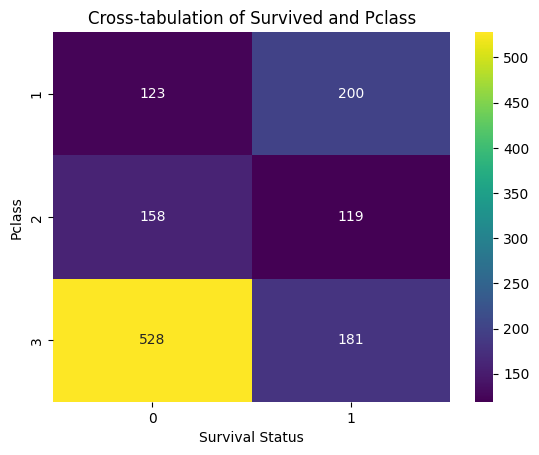

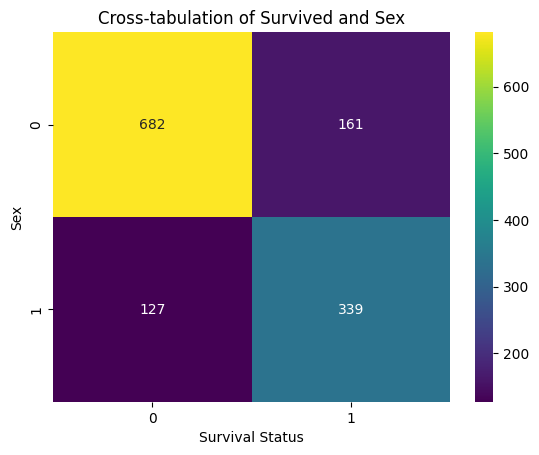

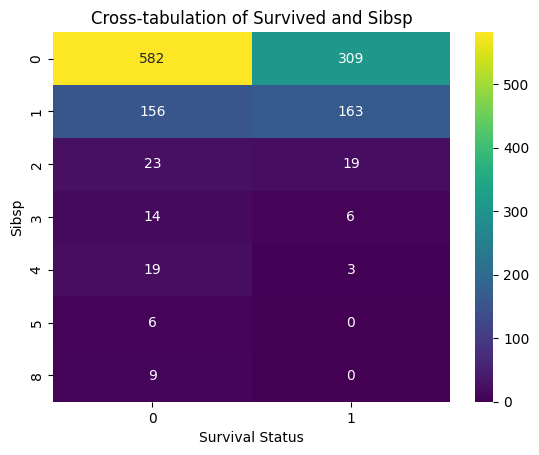

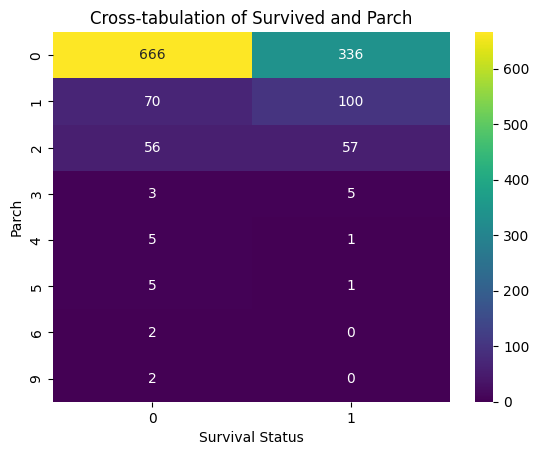

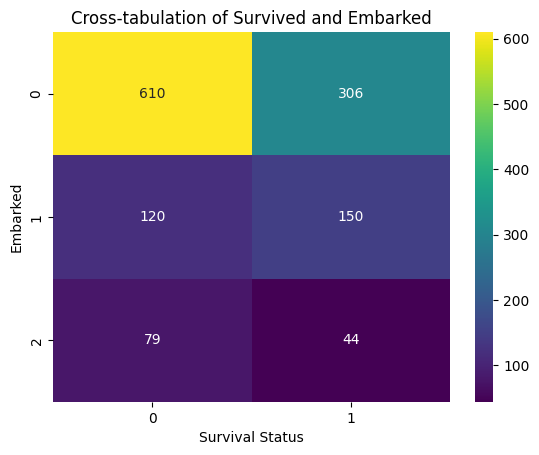

In [ ]:
# For Showing Heading in Jupyter Notebook
from IPython.display import display, HTML

# 1. Plotting Heatmap of a Cross-Tabulation

display(HTML("<h1 style='font-size:18px;'>1. Heatmap of a Cross-Tabulation</h1><br>"))

for var in categorical_vars:

    cross_tab = pd.crosstab(df[var], df['survived'])
    sns.heatmap(cross_tab, annot=True, fmt='d', cmap='viridis')
    plt.title(f'Cross-tabulation of Survived and {var.capitalize()}')

    plt.xlabel("Survival Status")
    plt.ylabel(var.capitalize())
    plt.show()

### 2. Plotting Bar Plot: This can show the count of each category, split by ‘survived’.

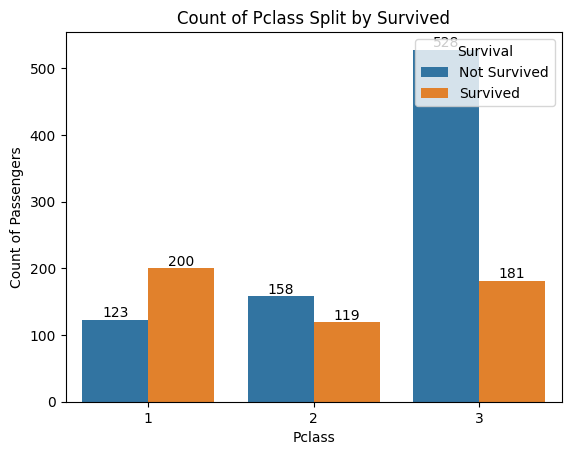

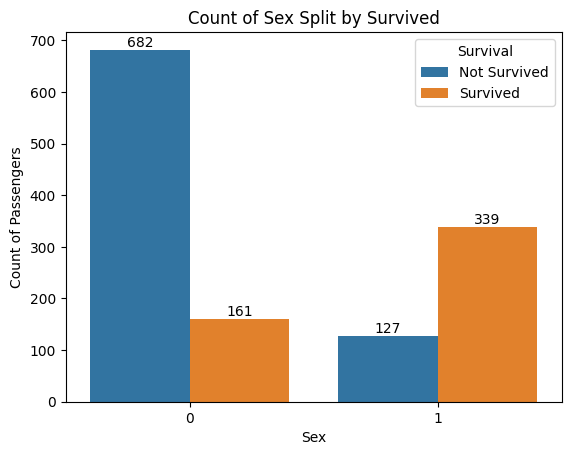

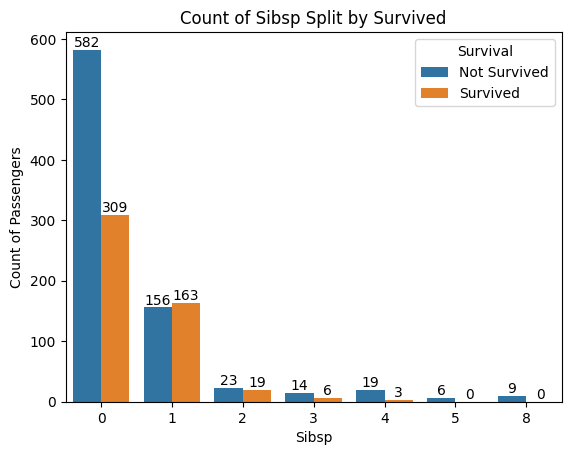

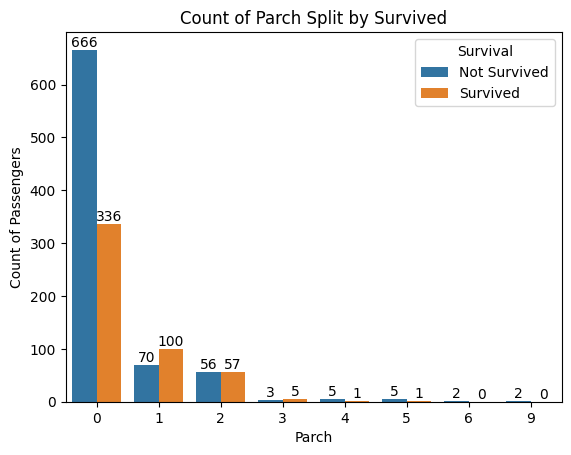

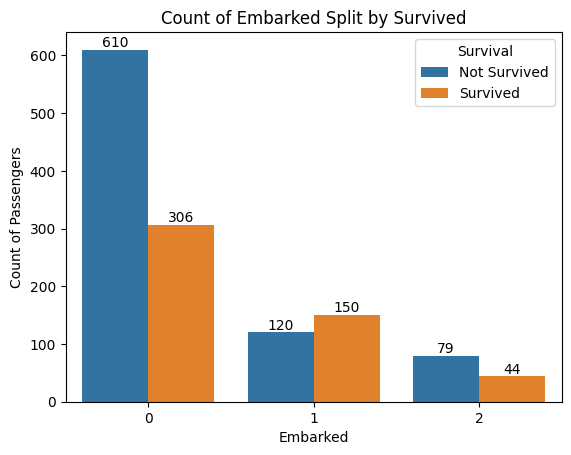

In [ ]:
# 2. Plotting Bar Plot

display(HTML("<h1 style='font-size:18px;'>2. Bar Plot</h1><br>"))

for var in categorical_vars:
    ax = sns.countplot(data=df, x=var, hue='survived')
    # Remove the default legend
    ax.get_legend().remove()

    # Adding values to bars
    for container in ax.containers:
        ax.bar_label(container)

    # Adding Legend with new labels
    plt.legend(title='Survival', loc='upper right', labels=['Not Survived','Survived'])
    plt.ylabel("Count of Passengers")
    plt.xlabel(var.capitalize())
    plt.title(f'Count of {var.capitalize()} Split by Survived')
    plt.show()

### 3. Plotting Box Plot: If you want to visualize the relationship between a categorical variable and a continuous variable, we can use a box plot.


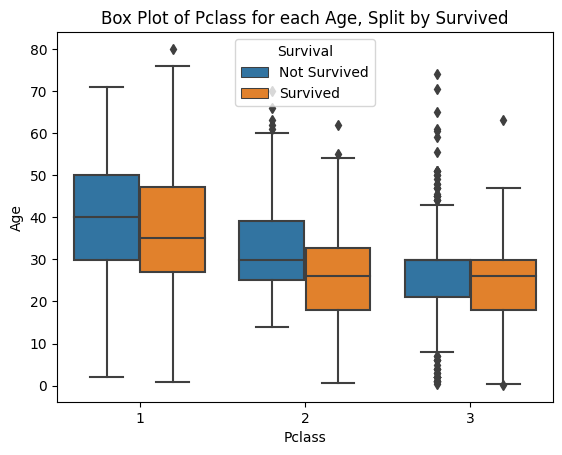

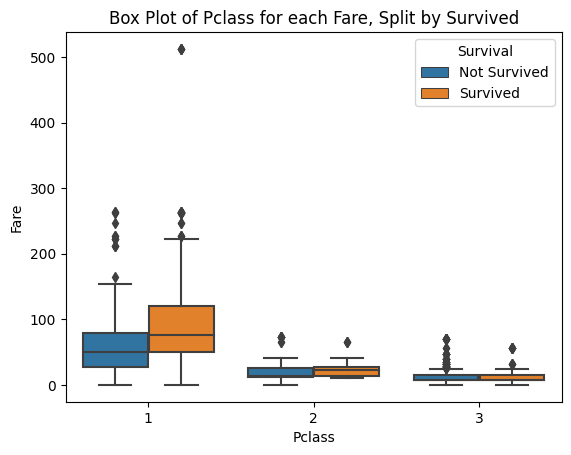

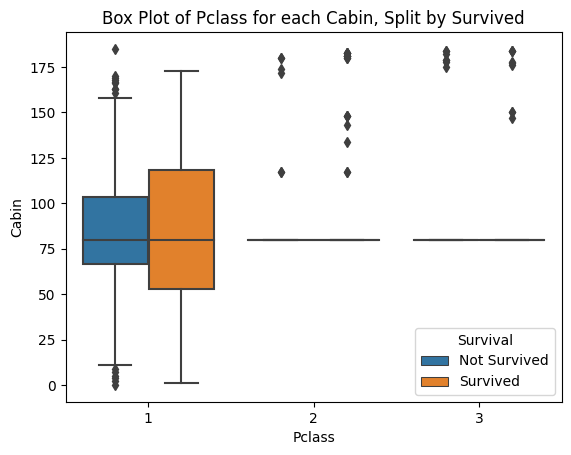

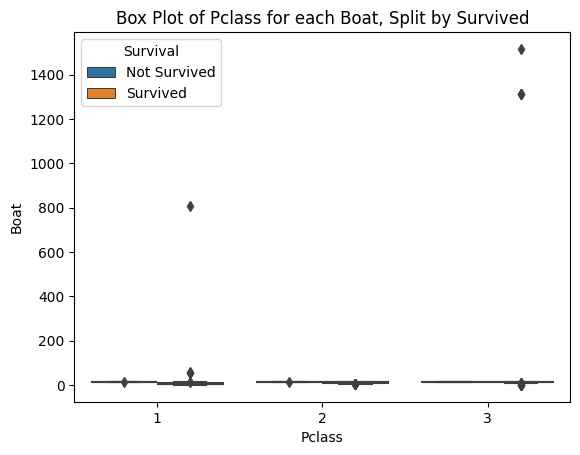

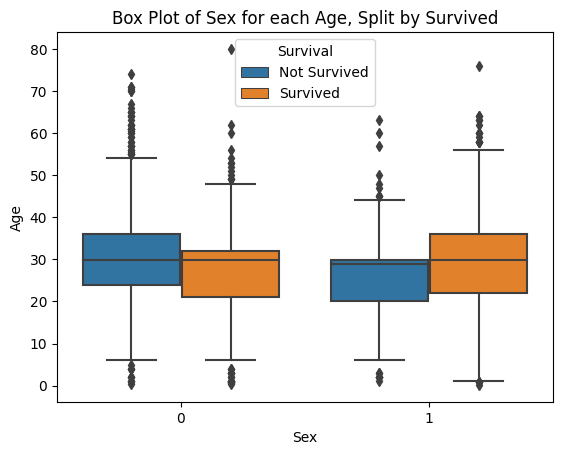

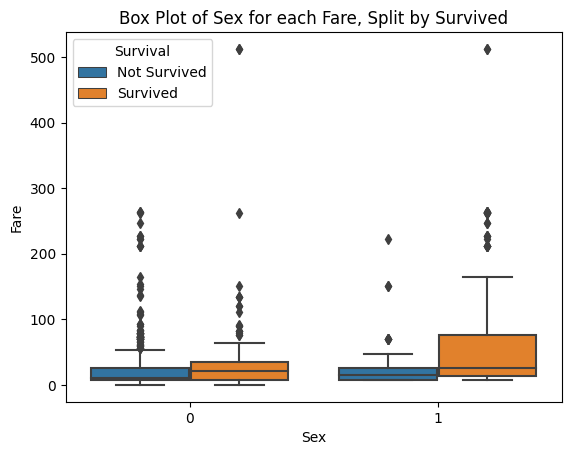

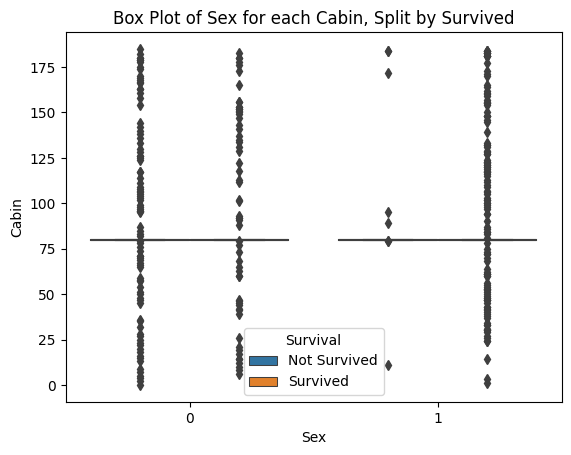

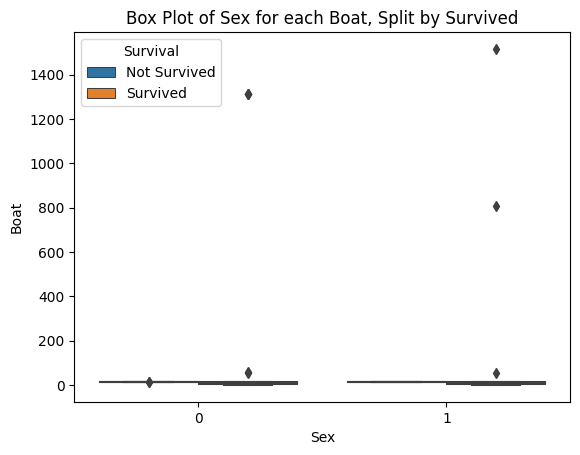

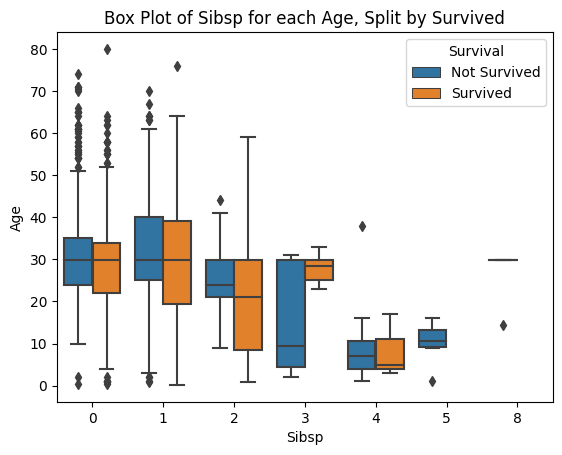

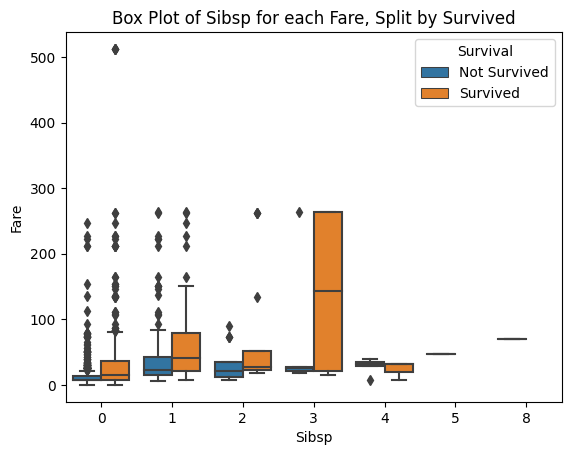

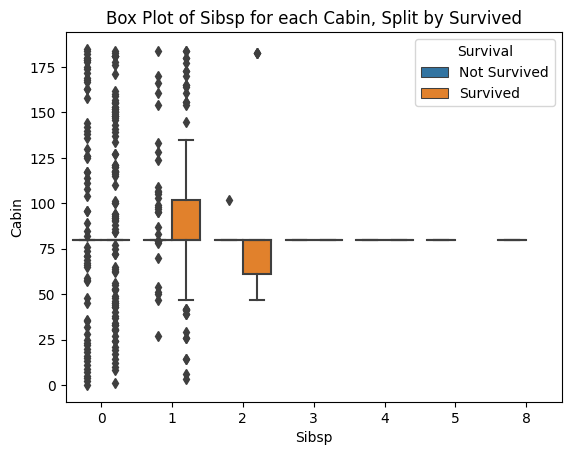

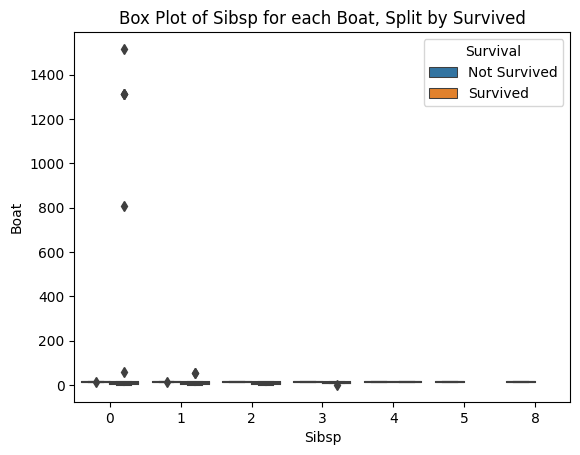

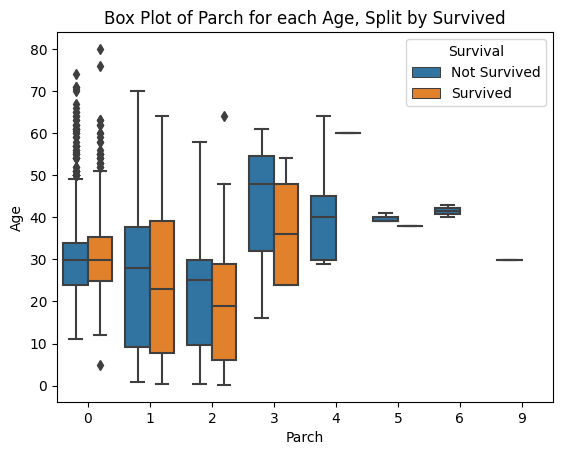

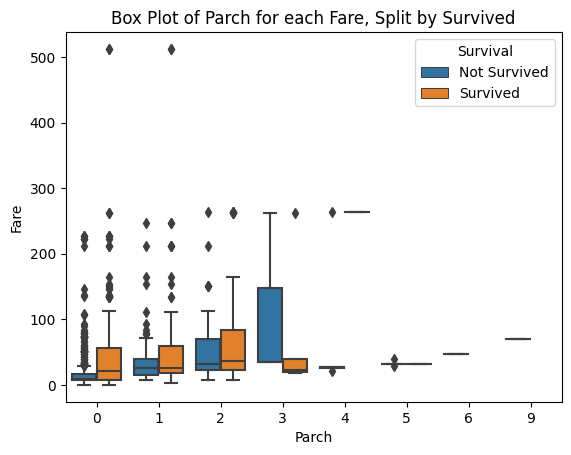

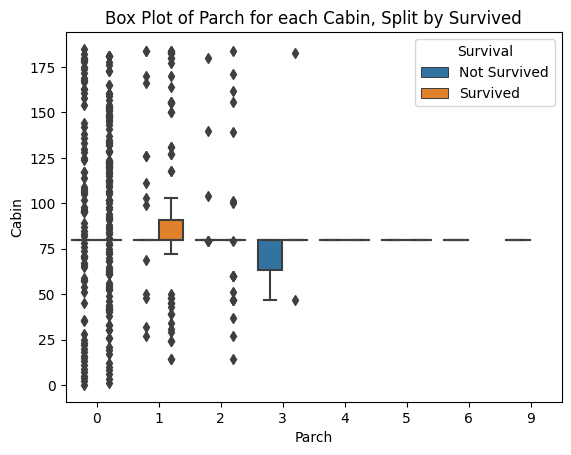

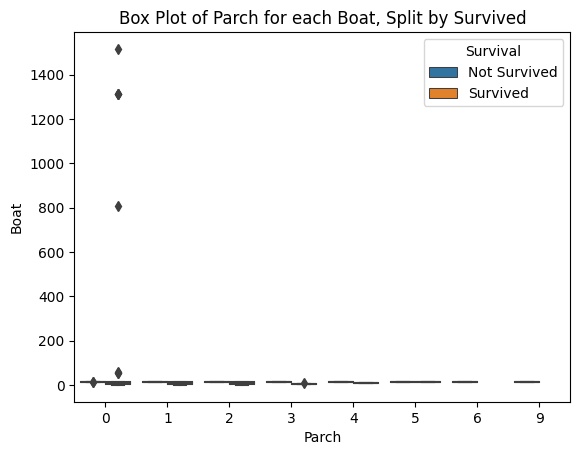

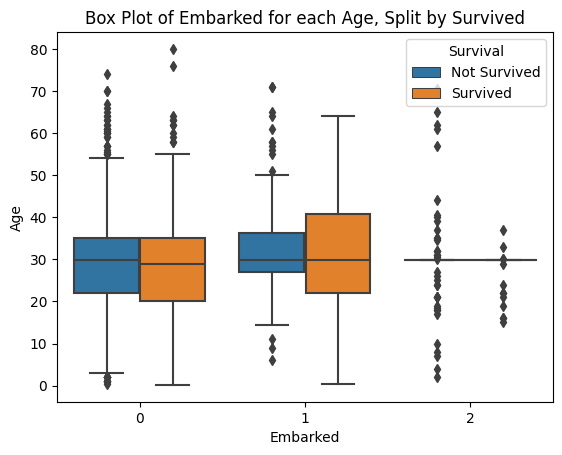

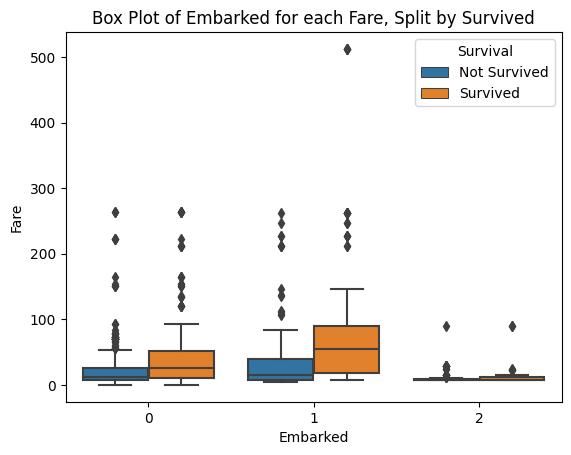

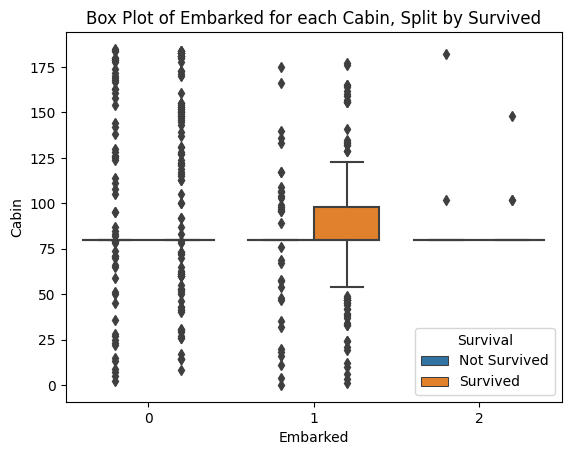

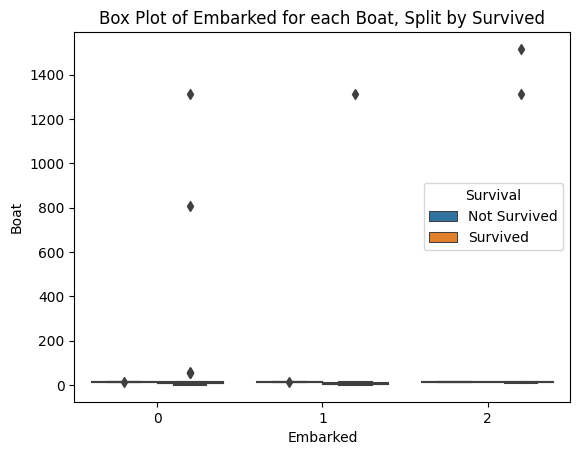

In [ ]:
# 3. Plotting Box Plot

display(HTML("<h1 style='font-size:18px;'>3. Box Plot</h1><br>"))

for cat_var in categorical_vars:
    for cont_var in continuous_vars:
        ax = sns.boxplot(data=df, x=cat_var, y=cont_var, hue='survived')

        # Get the existing legend
        legend = ax.get_legend()

        # Modify the labels of the existing legend
        legend.set_title('Survival')
        for t, l in zip(legend.texts, ['Not Survived', 'Survived']):
            t.set_text(l)

        plt.title(f'Box Plot of {cat_var.capitalize()} for each {cont_var.capitalize()}, Split by Survived')
        plt.xlabel(cat_var.capitalize())
        plt.ylabel(cont_var.capitalize())
        plt.show()


### 4. Plotting Violin Plot: If you want to visualize the relationship between a categorical variable and a continuous variable, we can use a violin plot.       


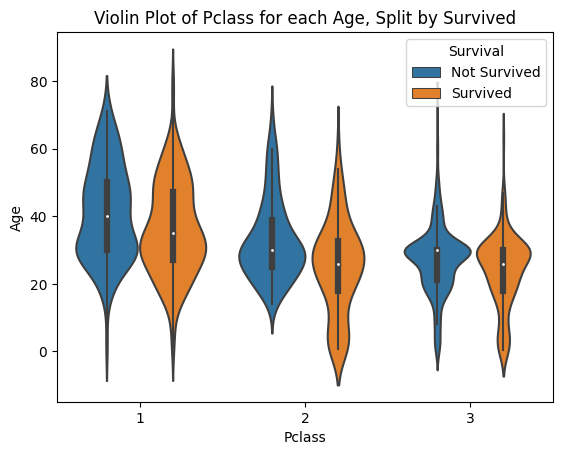

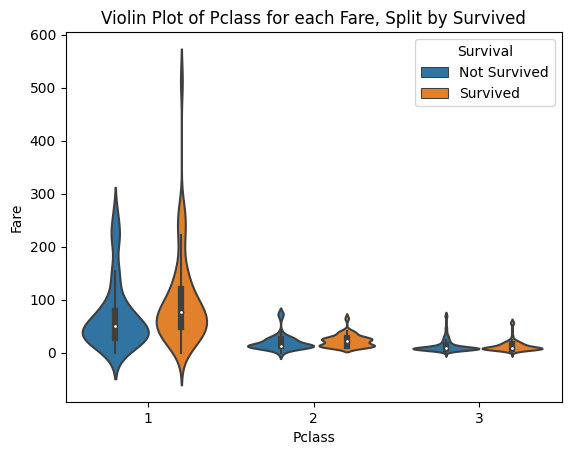

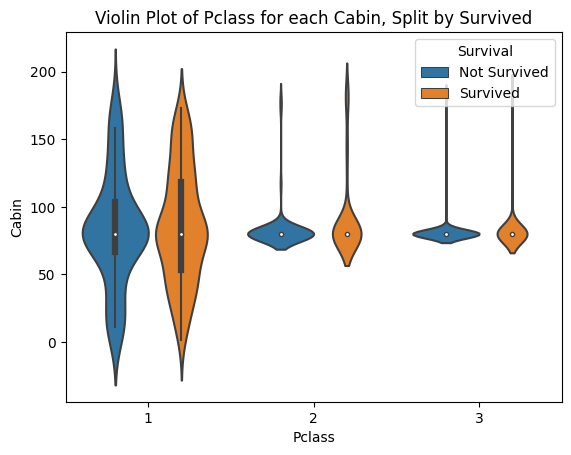

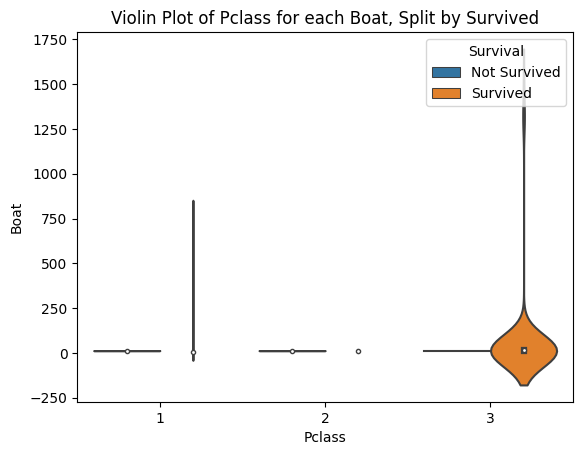

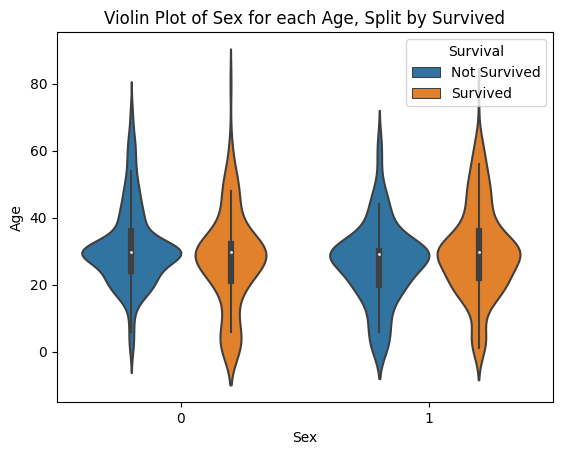

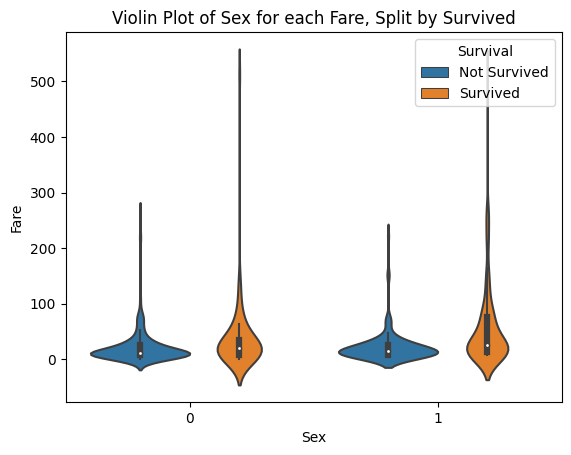

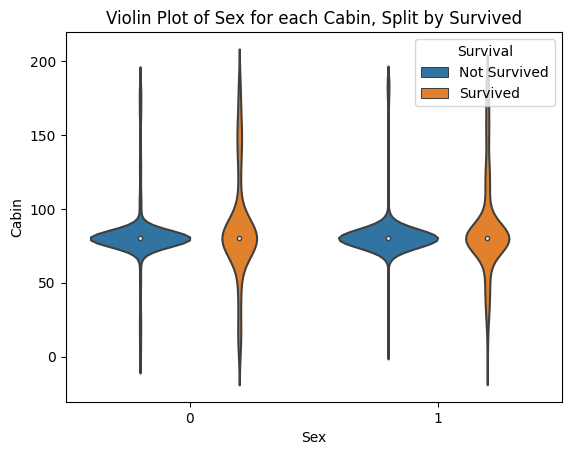

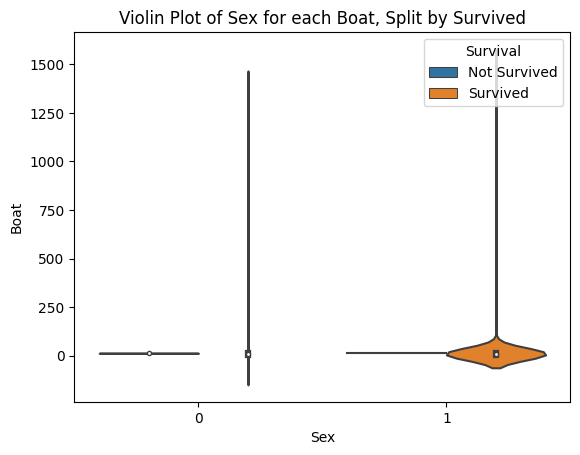

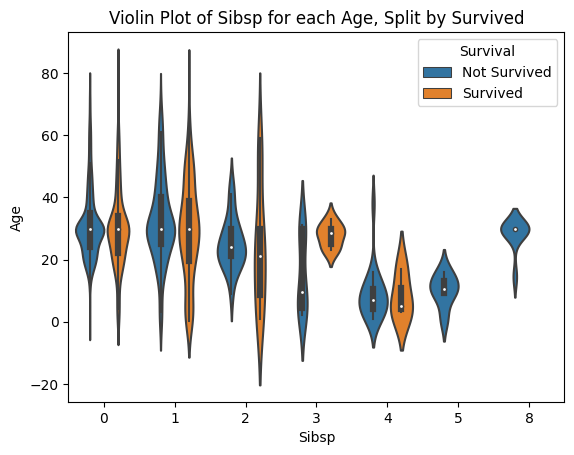

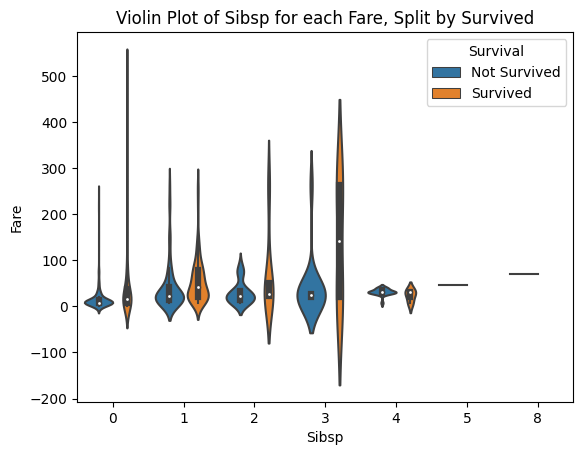

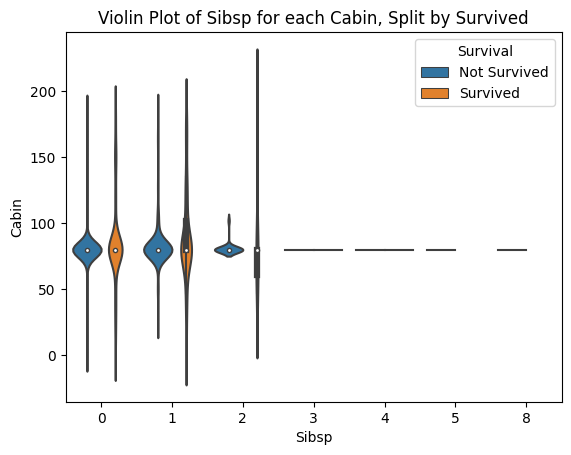

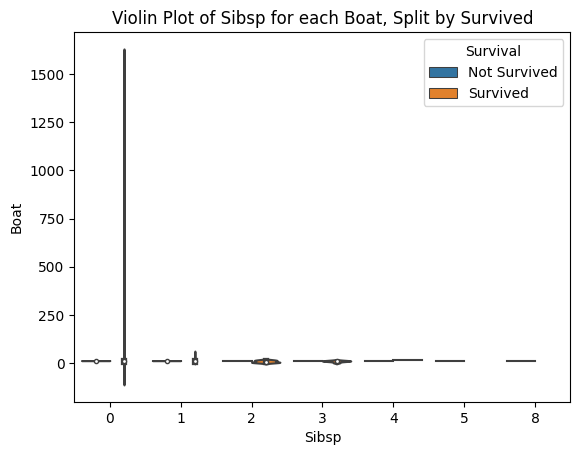

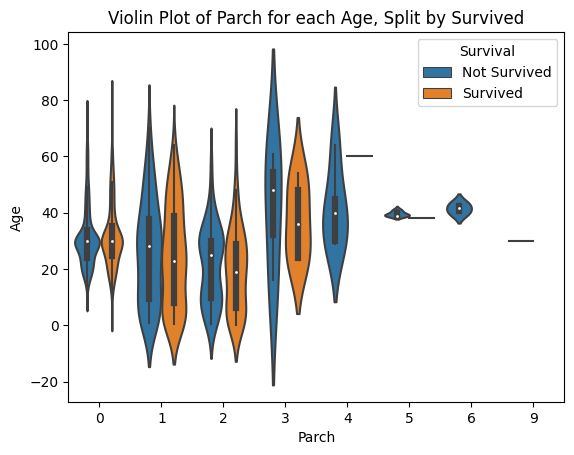

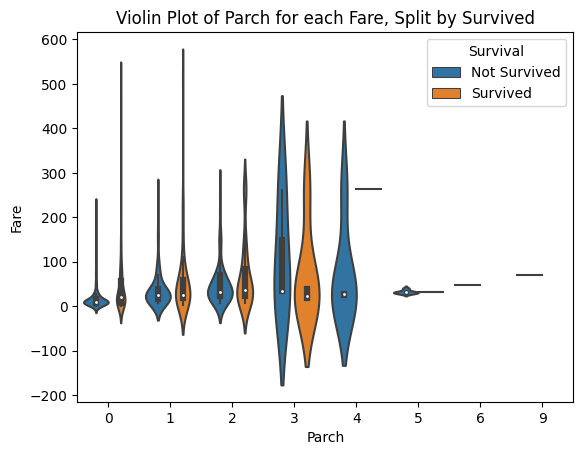

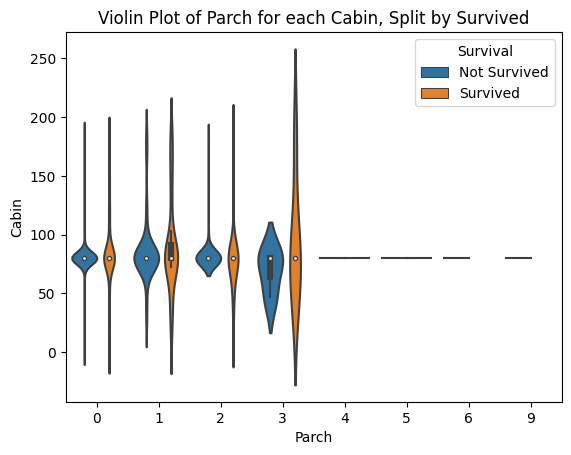

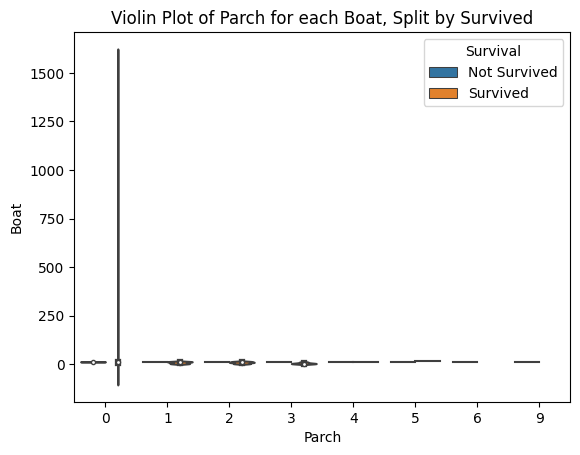

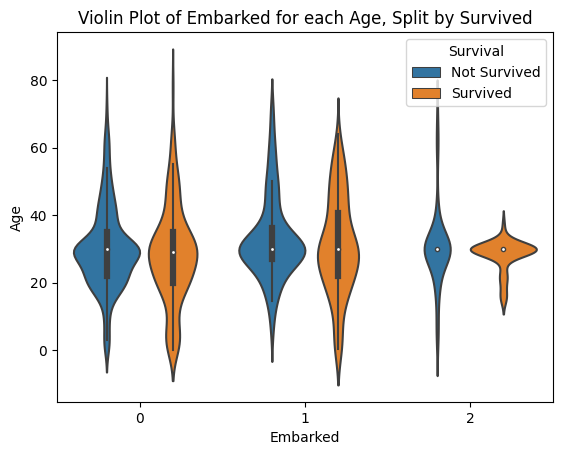

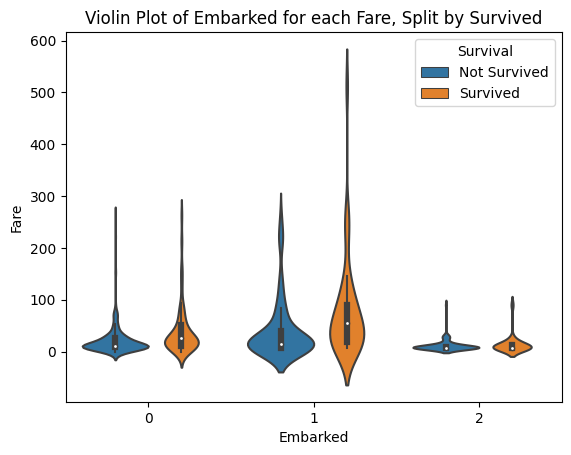

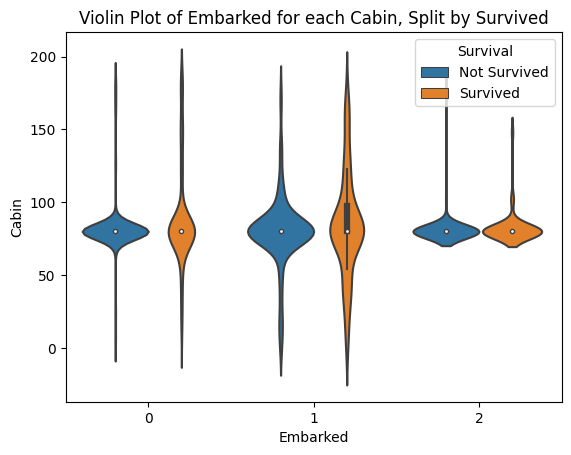

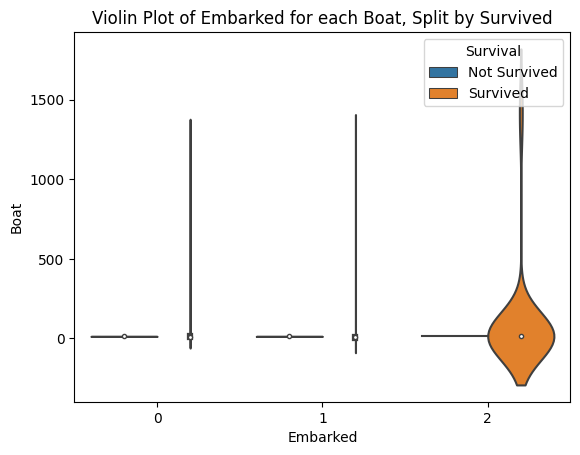

In [ ]:
# 4. Plotting Violin Plot:

display(HTML("<h1 style='font-size:18px;'>4. Violin Plot</h1><br>"))

for cat_var in categorical_vars:
    for cont_var in continuous_vars:
        ax = sns.violinplot(data=df, x=cat_var, y=cont_var, hue='survived')

        # Get the existing legend
        legend = ax.get_legend()

        # Modify the labels of the existing legend
        legend.set_title('Survival')
        for t, l in zip(legend.texts, ['Not Survived', 'Survived']):
            t.set_text(l)

        plt.title(f'Violin Plot of {cat_var.capitalize()} for each {cont_var.capitalize()}, Split by Survived')
        plt.xlabel(cat_var.capitalize())
        plt.ylabel(cont_var.capitalize())
        plt.show()



## Making Correlation Matrix for dataset.

In [ ]:
corr_mat = df.corr()

print("Correlation Matrix for Dataset is:\n")
print(corr_mat)

Correlation Matrix for Dataset is:

             age    ticket      fare     cabin          boat          body
age     1.000000 -0.045384  0.171521 -0.023539 -2.385516e-02  1.964239e-02
ticket -0.045384  1.000000 -0.090477 -0.024958 -5.497981e-03 -3.374542e-03
fare    0.171521 -0.090477  1.000000 -0.035034 -4.558282e-02 -1.058336e-02
cabin  -0.023539 -0.024958 -0.035034  1.000000 -9.013756e-03 -1.641532e-02
boat   -0.023855 -0.005498 -0.045583 -0.009014  1.000000e+00  6.851970e-17
body    0.019642 -0.003375 -0.010583 -0.016415  6.851970e-17  1.000000e+00


## Visualizing Heat Map/ Correlation Plot for this dataset.

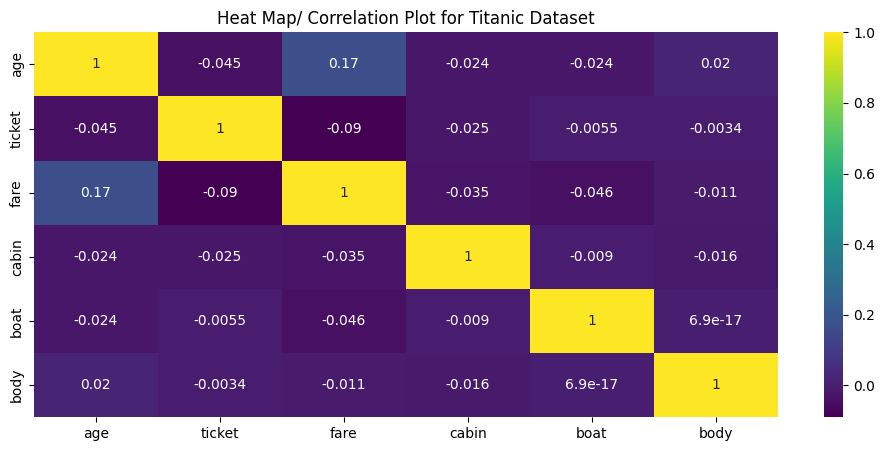

In [ ]:
# Setting Figure Size
plt.figure(figsize = (12,5))
sns.heatmap(corr_mat, annot = True, cmap = 'viridis')

plt.title("Heat Map/ Correlation Plot for Titanic Dataset")
plt.show()

## Machine Learning Model
### Since the Data is Preprocessed now, we will begin with machine learning model.

### 1. Data Gathering
We have already gathered and preprocessed data so we can directly use it now.

In [ ]:
# Reading CSV file
df = pd.read_csv("/content/Preprocessed Titanic Dataset.csv")

print("Dataset is:\n")
print(df.head(n = 7))

Dataset is:

   pclass  survived  sex      age  sibsp  parch    ticket      fare  cabin  \
0       1         1    1  29.0000      0      0   24160.0  211.3375     43   
1       1         1    0   0.9167      1      2  113781.0  151.5500     79   
2       1         0    1   2.0000      1      2  113781.0  151.5500     79   
3       1         0    0  30.0000      1      2  113781.0  151.5500     79   
4       1         0    1  25.0000      1      2  113781.0  151.5500     79   
5       1         1    0  48.0000      0      0   19952.0   26.5500    149   
6       1         1    1  63.0000      1      0   13502.0   77.9583    145   

   embarked  boat        body                        home.dest last_name  \
0         0   2.0  160.809917                     St Louis, MO     Allen   
1         0  11.0  160.809917  Montreal, PQ / Chesterville, ON   Allison   
2         0  13.0  160.809917  Montreal, PQ / Chesterville, ON   Allison   
3         0  13.0  135.000000  Montreal, PQ / Chesterville

## 2. Feature Engineering
Now the next task is to add features for input and output.

In [ ]:
# Seeing the Columns of dataset and their datatype
print("Columns of dataset are:\n")
df.info()

Columns of dataset are:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   pclass      1309 non-null   int64  
 1   survived    1309 non-null   int64  
 2   sex         1309 non-null   int64  
 3   age         1309 non-null   float64
 4   sibsp       1309 non-null   int64  
 5   parch       1309 non-null   int64  
 6   ticket      1309 non-null   float64
 7   fare        1309 non-null   float64
 8   cabin       1309 non-null   int64  
 9   embarked    1309 non-null   int64  
 10  boat        1309 non-null   float64
 11  body        1309 non-null   float64
 12  home.dest   1309 non-null   object 
 13  last_name   1309 non-null   object 
 14  first_name  1309 non-null   object 
 15  title       1309 non-null   object 
dtypes: float64(5), int64(7), object(4)
memory usage: 163.8+ KB


In [ ]:
# First we will remove all columns with object data type as model cannot work on that
for col in df.columns:
  if df[col].dtype == 'object':
    df.drop(col, inplace = True, axis = 1)

### Splitting between Input and Output.

In [ ]:
# Input
X = df.drop(columns = ['survived'], axis = 1)

# Output
Y = df['survived']

# Seeing Shape of Input and Output
print("Shape of Input is:", X.shape)
print("\nShape of Output is:", Y.shape)

Shape of Input is: (1309, 11)

Shape of Output is: (1309,)


### Splitting Between Testing and Training Data.

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, train_size = 0.8)

## 3. Choosing Algorithm and Training
Here we will create a function which will test all Supervised learning algorithms on this data.


In [ ]:
# Importing Algorithms
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

# Creating Object for Algorithms
# Create instances of classifiers using a dictionary
classifiers_dict = {
    "K Nearest Neighbor": KNeighborsClassifier(),
    "Support Vector Machine": SVC(),
    "Decision Tree Classifier": DecisionTreeClassifier(),
    "Naive Bayes Classifier": GaussianNB(),
    "Random Forest Classifier": RandomForestClassifier(),
    "Logistic Regression": LogisticRegression()
}

## Training Model

In [ ]:
# We have dictionary so we will directly use it

# Assuming you have a dictionary named classifiers_dict

for classifier_name, classifier_instance in classifiers_dict.items():
    classifier_instance.fit(x_train, y_train)
    print(f"Successfully Trained {classifier_name} Classifier.")

Successfully Trained K Nearest Neighbor Classifier.
Successfully Trained Support Vector Machine Classifier.
Successfully Trained Decision Tree Classifier Classifier.
Successfully Trained Naive Bayes Classifier Classifier.
Successfully Trained Random Forest Classifier Classifier.
Successfully Trained Logistic Regression Classifier.


## Testing Model/ Model Evaluation

In [ ]:
# For Showing Heading in Jupyter Notebook
from IPython.display import display, HTML

# Importing Required Functions
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Create a dictionary to store accuracies for each model
accuracy_dict = {}

for classifier_name, classifier_instance in classifiers_dict.items():

    # Display model name
    display(HTML(f"<h1 style='font-size:20 px;'>Evaluation Measures for Algorithm {classifier_name} are:</h2><br>"))

    # Training phase
    pred_train = classifier_instance.predict(x_train)

    # Training Accuracy and Classification report and Confusion Matrix
    display(HTML(f"<h2 style='font-size: 14 px'>Training Accuracy is: {accuracy_score(y_train, pred_train)*100} </h1><br>"))
    print("\nConfusion Matrix is:\n")
    print(confusion_matrix(y_train, pred_train))
    print("\nClassification Report is:\n")
    print(classification_report(y_train, pred_train))

    # Testing phase
    pred_test = classifier_instance.predict(x_test)

    # Testing Accuracy and Classification report and Confusion Matrix
    testing_accuracy = accuracy_score(y_test, pred_test) * 100
    display(HTML(f"<h2 style='font-size: 14 px'>Testing Accuracy is: {testing_accuracy} </h2><br>"))
    print("\nConfusion Matrix is:\n")
    print(confusion_matrix(y_test, pred_test))
    print("\nClassification Report is:\n")
    print(classification_report(y_test, pred_test))

    # Store the testing accuracy in the dictionary
    accuracy_dict[classifier_name] = testing_accuracy


Confusion Matrix is:

[[549 106]
 [135 257]]

Classification Report is:

              precision    recall  f1-score   support

           0       0.80      0.84      0.82       655
           1       0.71      0.66      0.68       392

    accuracy                           0.77      1047
   macro avg       0.76      0.75      0.75      1047
weighted avg       0.77      0.77      0.77      1047




Confusion Matrix is:

[[120  34]
 [ 51  57]]

Classification Report is:

              precision    recall  f1-score   support

           0       0.70      0.78      0.74       154
           1       0.63      0.53      0.57       108

    accuracy                           0.68       262
   macro avg       0.66      0.65      0.66       262
weighted avg       0.67      0.68      0.67       262




Confusion Matrix is:

[[655   0]
 [392   0]]

Classification Report is:

              precision    recall  f1-score   support

           0       0.63      1.00      0.77       655
           1       0.00      0.00      0.00       392

    accuracy                           0.63      1047
   macro avg       0.31      0.50      0.38      1047
weighted avg       0.39      0.63      0.48      1047



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Confusion Matrix is:

[[154   0]
 [108   0]]

Classification Report is:

              precision    recall  f1-score   support

           0       0.59      1.00      0.74       154
           1       0.00      0.00      0.00       108

    accuracy                           0.59       262
   macro avg       0.29      0.50      0.37       262
weighted avg       0.35      0.59      0.44       262



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Confusion Matrix is:

[[654   1]
 [  0 392]]

Classification Report is:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       655
           1       1.00      1.00      1.00       392

    accuracy                           1.00      1047
   macro avg       1.00      1.00      1.00      1047
weighted avg       1.00      1.00      1.00      1047




Confusion Matrix is:

[[132  22]
 [ 12  96]]

Classification Report is:

              precision    recall  f1-score   support

           0       0.92      0.86      0.89       154
           1       0.81      0.89      0.85       108

    accuracy                           0.87       262
   macro avg       0.87      0.87      0.87       262
weighted avg       0.87      0.87      0.87       262




Confusion Matrix is:

[[653   2]
 [377  15]]

Classification Report is:

              precision    recall  f1-score   support

           0       0.63      1.00      0.78       655
           1       0.88      0.04      0.07       392

    accuracy                           0.64      1047
   macro avg       0.76      0.52      0.42      1047
weighted avg       0.73      0.64      0.51      1047




Confusion Matrix is:

[[153   1]
 [104   4]]

Classification Report is:

              precision    recall  f1-score   support

           0       0.60      0.99      0.74       154
           1       0.80      0.04      0.07       108

    accuracy                           0.60       262
   macro avg       0.70      0.52      0.41       262
weighted avg       0.68      0.60      0.47       262




Confusion Matrix is:

[[654   1]
 [  0 392]]

Classification Report is:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       655
           1       1.00      1.00      1.00       392

    accuracy                           1.00      1047
   macro avg       1.00      1.00      1.00      1047
weighted avg       1.00      1.00      1.00      1047




Confusion Matrix is:

[[140  14]
 [ 14  94]]

Classification Report is:

              precision    recall  f1-score   support

           0       0.91      0.91      0.91       154
           1       0.87      0.87      0.87       108

    accuracy                           0.89       262
   macro avg       0.89      0.89      0.89       262
weighted avg       0.89      0.89      0.89       262




Confusion Matrix is:

[[655   0]
 [392   0]]

Classification Report is:



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.63      1.00      0.77       655
           1       0.00      0.00      0.00       392

    accuracy                           0.63      1047
   macro avg       0.31      0.50      0.38      1047
weighted avg       0.39      0.63      0.48      1047




Confusion Matrix is:

[[154   0]
 [108   0]]

Classification Report is:

              precision    recall  f1-score   support

           0       0.59      1.00      0.74       154
           1       0.00      0.00      0.00       108

    accuracy                           0.59       262
   macro avg       0.29      0.50      0.37       262
weighted avg       0.35      0.59      0.44       262



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Finding the Model with Highest accuracy.

In [ ]:
# Finding the model with the maximum testing accuracy
best_model = max(accuracy_dict, key=accuracy_dict.get)
display(HTML(f"<h3 style='font-size: 14 px'>The model with the Maximum Testing accuracy is: {best_model} with accuracy {accuracy_dict[best_model]}</h3>"))

## Implementing Hyperparameter Tuning.

### Creating Parameter Grid For each Model.
### Since SVC will take much resources we are removing it.

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

# Create instances of classifiers using a dictionary
classifiers_dict = {
    "K Nearest Neighbor": KNeighborsClassifier(),
    "Decision Tree Classifier": DecisionTreeClassifier(),
    "Naive Bayes Classifier": GaussianNB(),
    "Random Forest Classifier": RandomForestClassifier(),
    "Logistic Regression": LogisticRegression()
}

param_grid = {
    'K Nearest Neighbor': {'n_neighbors': [3, 5, 7], 'weights': ['uniform', 'distance'], 'algorithm': ['ball_tree', 'kd_tree', 'brute']},

    'Decision Tree Classifier': {
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'criterion': ['gini', 'entropy'],
    },

    'Naive Bayes Classifier': {},  # Naive Bayes doesn't have hyperparameters

    'Random Forest Classifier': {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'criterion': ['gini', 'entropy'],
    },

    'Logistic Regression': {
        'C': [0.1, 1, 10],
        'penalty': ['l1', 'l2'],
        'solver': ['liblinear', 'saga'],
        'max_iter': [100, 200, 300],
    }
}

# Create a dictionary to store grid search results and best models
grid_search_results = {}

### Looping through each classifier and giving the parameters and evaluating.

In [ ]:
# Importing Required Functions
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Create a dictionary to store grid search results and best models
grid_search_results = {}

# Loop through each classifier
for classifier_name, classifier_instance in classifiers_dict.items():

    # Display model name
    display(HTML(f"<h1 style='font-size:20 px;'>Grid Search and Evaluation Measures for Algorithm {classifier_name} are:</h2><br>"))

    # Set up GridSearchCV
    grid_search = GridSearchCV(classifier_instance, param_grid[classifier_name], scoring=make_scorer(accuracy_score), cv=5, n_jobs=-1)

    # Fit the model using GridSearchCV
    grid_search.fit(x_train, y_train)

    # Get the best model from GridSearchCV
    best_model = grid_search.best_estimator_

    # Store grid search results
    grid_search_results[classifier_name] = {
        'best_model': best_model,
        'grid_search': grid_search
    }

    # Display best parameters
    # Display best parameters without brackets
    best_params_str = ', '.join(f'{key}: {value}' for key, value in grid_search.best_params_.items())
    display(HTML(f"<h2 style='font-size: 14 px'>Best Parameters are: {best_params_str} </h2><br>"))


    # Display evaluation metrics for the best model
    pred_train = best_model.predict(x_train)
    display(HTML(f"<h2 style='font-size: 14 px'>Best Model Training Accuracy is: {accuracy_score(y_train, pred_train)*100} </h1><br>"))
    print("\nConfusion Matrix for Best Model on Training Data is:\n")
    print(confusion_matrix(y_train, pred_train))
    print("\nClassification Report for Best Model on Training Data is:\n")
    print(classification_report(y_train, pred_train))

    pred_test = best_model.predict(x_test)

    # Testing Accuracy and Classification report and Confusion Matrix
    testing_accuracy = accuracy_score(y_test, pred_test) * 100
    display(HTML(f"<h2 style='font-size: 14 px'>Best Model Testing Accuracy is: {testing_accuracy} </h2><br>"))
    print("\nConfusion Matrix for Best Model on Testing Data is:\n")
    print(confusion_matrix(y_test, pred_test))
    print("\nClassification Report for Best Model on Testing Data is:\n")
    print(classification_report(y_test, pred_test))



Confusion Matrix for Best Model on Training Data is:

[[539 116]
 [147 245]]

Classification Report for Best Model on Training Data is:

              precision    recall  f1-score   support

           0       0.79      0.82      0.80       655
           1       0.68      0.62      0.65       392

    accuracy                           0.75      1047
   macro avg       0.73      0.72      0.73      1047
weighted avg       0.75      0.75      0.75      1047




Confusion Matrix for Best Model on Testing Data is:

[[124  30]
 [ 53  55]]

Classification Report for Best Model on Testing Data is:

              precision    recall  f1-score   support

           0       0.70      0.81      0.75       154
           1       0.65      0.51      0.57       108

    accuracy                           0.68       262
   macro avg       0.67      0.66      0.66       262
weighted avg       0.68      0.68      0.68       262




Confusion Matrix for Best Model on Training Data is:

[[639  16]
 [ 30 362]]

Classification Report for Best Model on Training Data is:

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       655
           1       0.96      0.92      0.94       392

    accuracy                           0.96      1047
   macro avg       0.96      0.95      0.95      1047
weighted avg       0.96      0.96      0.96      1047




Confusion Matrix for Best Model on Testing Data is:

[[141  13]
 [ 19  89]]

Classification Report for Best Model on Testing Data is:

              precision    recall  f1-score   support

           0       0.88      0.92      0.90       154
           1       0.87      0.82      0.85       108

    accuracy                           0.88       262
   macro avg       0.88      0.87      0.87       262
weighted avg       0.88      0.88      0.88       262




Confusion Matrix for Best Model on Training Data is:

[[653   2]
 [377  15]]

Classification Report for Best Model on Training Data is:

              precision    recall  f1-score   support

           0       0.63      1.00      0.78       655
           1       0.88      0.04      0.07       392

    accuracy                           0.64      1047
   macro avg       0.76      0.52      0.42      1047
weighted avg       0.73      0.64      0.51      1047




Confusion Matrix for Best Model on Testing Data is:

[[153   1]
 [104   4]]

Classification Report for Best Model on Testing Data is:

              precision    recall  f1-score   support

           0       0.60      0.99      0.74       154
           1       0.80      0.04      0.07       108

    accuracy                           0.60       262
   macro avg       0.70      0.52      0.41       262
weighted avg       0.68      0.60      0.47       262




Confusion Matrix for Best Model on Training Data is:

[[652   3]
 [ 41 351]]

Classification Report for Best Model on Training Data is:

              precision    recall  f1-score   support

           0       0.94      1.00      0.97       655
           1       0.99      0.90      0.94       392

    accuracy                           0.96      1047
   macro avg       0.97      0.95      0.95      1047
weighted avg       0.96      0.96      0.96      1047




Confusion Matrix for Best Model on Testing Data is:

[[146   8]
 [ 17  91]]

Classification Report for Best Model on Testing Data is:

              precision    recall  f1-score   support

           0       0.90      0.95      0.92       154
           1       0.92      0.84      0.88       108

    accuracy                           0.90       262
   macro avg       0.91      0.90      0.90       262
weighted avg       0.91      0.90      0.90       262




Confusion Matrix for Best Model on Training Data is:

[[565  90]
 [126 266]]

Classification Report for Best Model on Training Data is:

              precision    recall  f1-score   support

           0       0.82      0.86      0.84       655
           1       0.75      0.68      0.71       392

    accuracy                           0.79      1047
   macro avg       0.78      0.77      0.78      1047
weighted avg       0.79      0.79      0.79      1047




Confusion Matrix for Best Model on Testing Data is:

[[134  20]
 [ 34  74]]

Classification Report for Best Model on Testing Data is:

              precision    recall  f1-score   support

           0       0.80      0.87      0.83       154
           1       0.79      0.69      0.73       108

    accuracy                           0.79       262
   macro avg       0.79      0.78      0.78       262
weighted avg       0.79      0.79      0.79       262



## Finding the Model with Highest accuracy after Hyperparameter Tuning.

In [ ]:
best_model_name = max(grid_search_results, key=lambda k: accuracy_score(y_test, grid_search_results[k]['best_model'].predict(x_test)))
best_model = grid_search_results[best_model_name]['best_model']
display(HTML(f"<h3 style='font-size: 14 px'>The model with the Maximum Testing accuracy after Hyperparameter Tuning is: {best_model_name} with accuracy {accuracy_score(y_test, best_model.predict(x_test))*100}</h3>"))